In [1]:
# Open VSCode and create a new project folder for your machine learning project.
# Open the terminal in VSCode by going to Terminal > New Terminal.
# Create a new environment using conda or pip. For example, to create a new environment with conda:
#     conda create --name myenv
#     conda activate myenv
# Install the necessary packages for your machine learning project. For example, to install scikit-learn:
#     conda install pandas numpy scikit-learn flask
#     pip install -r requirements.txt             use this if you had initially loaded some packages to the file
# Export the dependencies of your project by running the command:
#     pip freeze > requirements.txt

<br>Table of Content:
* [Import Libraries](#1)
* [Load Data](#2)
* [Exploratory Data Analysis (EDA)](#3)
* [Data Preprocessing](#4)
    * [Data Cleaning](#4a)
    * [Data Transformation](#4b)
    * [Handling Imbalanced Data](#4c)
    * [Data Reduction](#4d)
* [Selecting and Training the Model](#5) 
* [Model Evaluation](#6) 
* [Feature Engineering](#7) 
* [Model Optimization](#8) 
* [Model Deployment](#9) 

<a id="1"></a> <br>
## Import Libraries

In [2]:
# Data Analysis      
import pandas as pd          # data analysis library for handling structured data             
import numpy as np           # mathematical library for working with numerical data
from metrics import *

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
import missingno as msno    #visualize missing data


# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000) 

> Demo

In [3]:
# import pandas as pd

# experiment_1 = pd.read_csv('exp1', index_col='time', parse_dates=True)
# experiment_2 = pd.read_csv('exp2', index_col='time', parse_dates=True)
# # Repeat for all experiments...
# experiment_10 = pd.read_csv('exp10', index_col='time', parse_dates=True)

# # Combine all experiments into a list for easy processing
# experiments = [experiment_1, experiment_2, ..., experiment_10]



# # CONVERT DATAFRAMES TO PYTORCH 
# import torch

# def df_to_tensor(df):
#     # Assuming 'df' is preprocessed and ready for conversion
#     # Convert df values to tensor
#     return torch.tensor(df.values, dtype=torch.float32)

# # Convert each experiment to a tensor and store in a new list
# tensor_experiments = [df_to_tensor(df) for df in experiments]




# # PREPARE DATALOADERS
# from torch.utils.data import TensorDataset, DataLoader

# # Combine original features with extra parameters (one approach)
# combined_data = np.concatenate([tensor_experiments, extra_params], axis=-1)  # New shape [n_experiments, time_steps, n_features + n_extra_features]

# # Example targets for demonstration
# # In a real scenario, replace 'dummy_targets' with your actual targets
# dummy_targets = torch.rand(len(tensor_experiments), output_dim)  # Randomly generated targets

# # Create TensorDataset and DataLoader
# dataset = TensorDataset(torch.stack(tensor_experiments), dummy_targets)
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)




# # BUILDING THE MODEL


#     # Tips 
#         #1. Consider Multi-Task Learning (MTL):
#             # Multi-Task Learning is a learning paradigm in machine learning where multiple learning tasks are solved at the same time, 
#             # while exploiting commonalities and differences across tasks. This approach can lead to improved learning efficiency and 
#             # prediction accuracy for the task models, especially when the tasks are related. In deep learning, this often involves 
#             # sharing layers between tasks, while having some task-specific layers towards the end of the mode 
            
#             # Imagine you have a dataset from your experiments, and you want to predict 4 main outputs, but you also have 3 other 
#             # parameters that are somewhat related and you believe predicting them could help improve the performance of your main task.
            
#             # In this example, MultiTaskLSTM is designed to make predictions for both the main task and an auxiliary task using shared 
#             # LSTM layers for feature extraction, and separate fully connected layers for each task's specific output.
            
            
#         # 2. Consider Attention Mechanisms (Best to use Transformer ones)
#             # Attention mechanisms allow models to focus on different parts of the input for each output part, improving the ability of 
#             # the model to capture dependencies, especially in sequences. In deep learning, attention mechanisms can dynamically weight 
#             # the importance of input elements.
            
#             # example: In this AttentionModel, an attention mechanism is applied to the output of an LSTM layer. The model computes 
#             # attention weights for each element in the sequence, which are then used to create a weighted sum (context vector) 
#             # representing the input sequence. This context vector is then fed into a fully connected layer to produce the final output.

<a id="2"></a> <br>
## Load Data

In [4]:
import os

os.chdir(r"C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research")

In [5]:
# adding attribute name to each dataframe

def add_attribute_name(df_list, df_name):
    """
    Adds an attribute name to each DataFrame in a list.

    :param df_list: List of pandas DataFrames to add attribute names to.
    :param attribute_name: Name of the attribute to add.
    :return: List of DataFrames with attribute names.
    """
    for index, df in enumerate(df_list, start=1):
        df.name = f"{df_name[index-1]}"
        
    return df_list



In [6]:

experiment_names = ['exp_210623_1', 'exp_210623_2', 'exp_210623_3', 'exp_210623_4', 
                    'exp_211013_1', 'exp_211013_2', 'exp_211013_3', 'exp_211013_4', 
                    'exp_211130_1', 'exp_211130_2', 'exp_211130_3', 'exp_211130_4', 
                    'exp_220309demo_1', 'exp_220309demo_2', 'exp_220309demo_3', 'exp_220309demo_4',
                    'exp_220315c1_1', 'exp_220315c1_2', 'exp_220315c1_3', 'exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
                    'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6', 
                    'exp_220822_1', 'exp_220822_2', 'exp_220822_3', 'exp_220822_4']



def load_data (experiments):
    # Load the data
    df_list = []
    for exp in experiments:
        df = pd.read_csv(f"data/final_cleaned/{exp}.csv", index_col='input_Timepoint (hr)', parse_dates=True)
        df.name = exp
        df_list.append(df)
    return df_list

# Load the data
experiment_data = load_data(experiment_names)
experiment_data = add_attribute_name(experiment_data, experiment_names)



In [7]:
# Group the loaded CSVs by experiment date (assuming the date is the first part of the experiment name before '_')
grouped_experiments = {}

for name, df in zip(experiment_names, experiment_data):
    date = name.split('_')[1]  # Extract date from the experiment name
    if date not in grouped_experiments:
        grouped_experiments[date] = [df]
    else:
        grouped_experiments[date].append(df)

# Convert the grouped experiments dictionary to a list of lists
experiment_groups = list(grouped_experiments.values())



> Missing values

In [8]:
print("Summary of Missing Values in Experiment Datasets:\n")
print(f"{'Experiment Name':<30} {'Missing Values':<15}")
print(f"{'-'*30} {'-'*15}")

for exp in experiment_data:
    # Assuming `exp` is a DataFrame and has a property or method `name`
    missing_values = exp.isnull().sum()
    # Summing up all missing values in the experiment dataset
    total_missing_values = missing_values.sum()
    print(f"{exp.name:<30} {total_missing_values:<15}")

    # If you want to show a breakdown of missing values by column
    for column, num_missing in missing_values.items():  # Changed iteritems() to items()
        if num_missing > 0:  # Optionally, only display columns with missing values
            print(f"  - {column:<27} {num_missing}")
    print("\n")  # Add a newline for better separation between experiments


Summary of Missing Values in Experiment Datasets:

Experiment Name                Missing Values 
------------------------------ ---------------
exp_210623_1                   32             
  - output_OD600                2
  - output_WCW_gl               6
  - output_glycerol_gl          6
  - output_glucose_gl           6
  - output_acetate_mmol_l       6
  - output_phosphate_mmol_l     6


exp_210623_2                   32             
  - output_OD600                2
  - output_WCW_gl               6
  - output_glycerol_gl          6
  - output_glucose_gl           6
  - output_acetate_mmol_l       6
  - output_phosphate_mmol_l     6


exp_210623_3                   33             
  - output_OD600                2
  - output_WCW_gl               7
  - output_glycerol_gl          6
  - output_glucose_gl           6
  - output_acetate_mmol_l       6
  - output_phosphate_mmol_l     6


exp_210623_4                   32             
  - output_OD600                2
  - output_WCW_

![Alt text](images/missing_data.png "Visualize missing values")


>> Data Understanding

Randomly selected experiment: exp_220822_1
                     input_vessel_type input_vessel_volume input_vessel_name  input_agitation_rpm  input_DO_%  input_pH_setpoint  input_gas_flow  input_air_%  input_O2  input_Temp_c input_media_type input_feed_type  input_glucose_limit  output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l
input_Timepoint (hr)                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0.0  

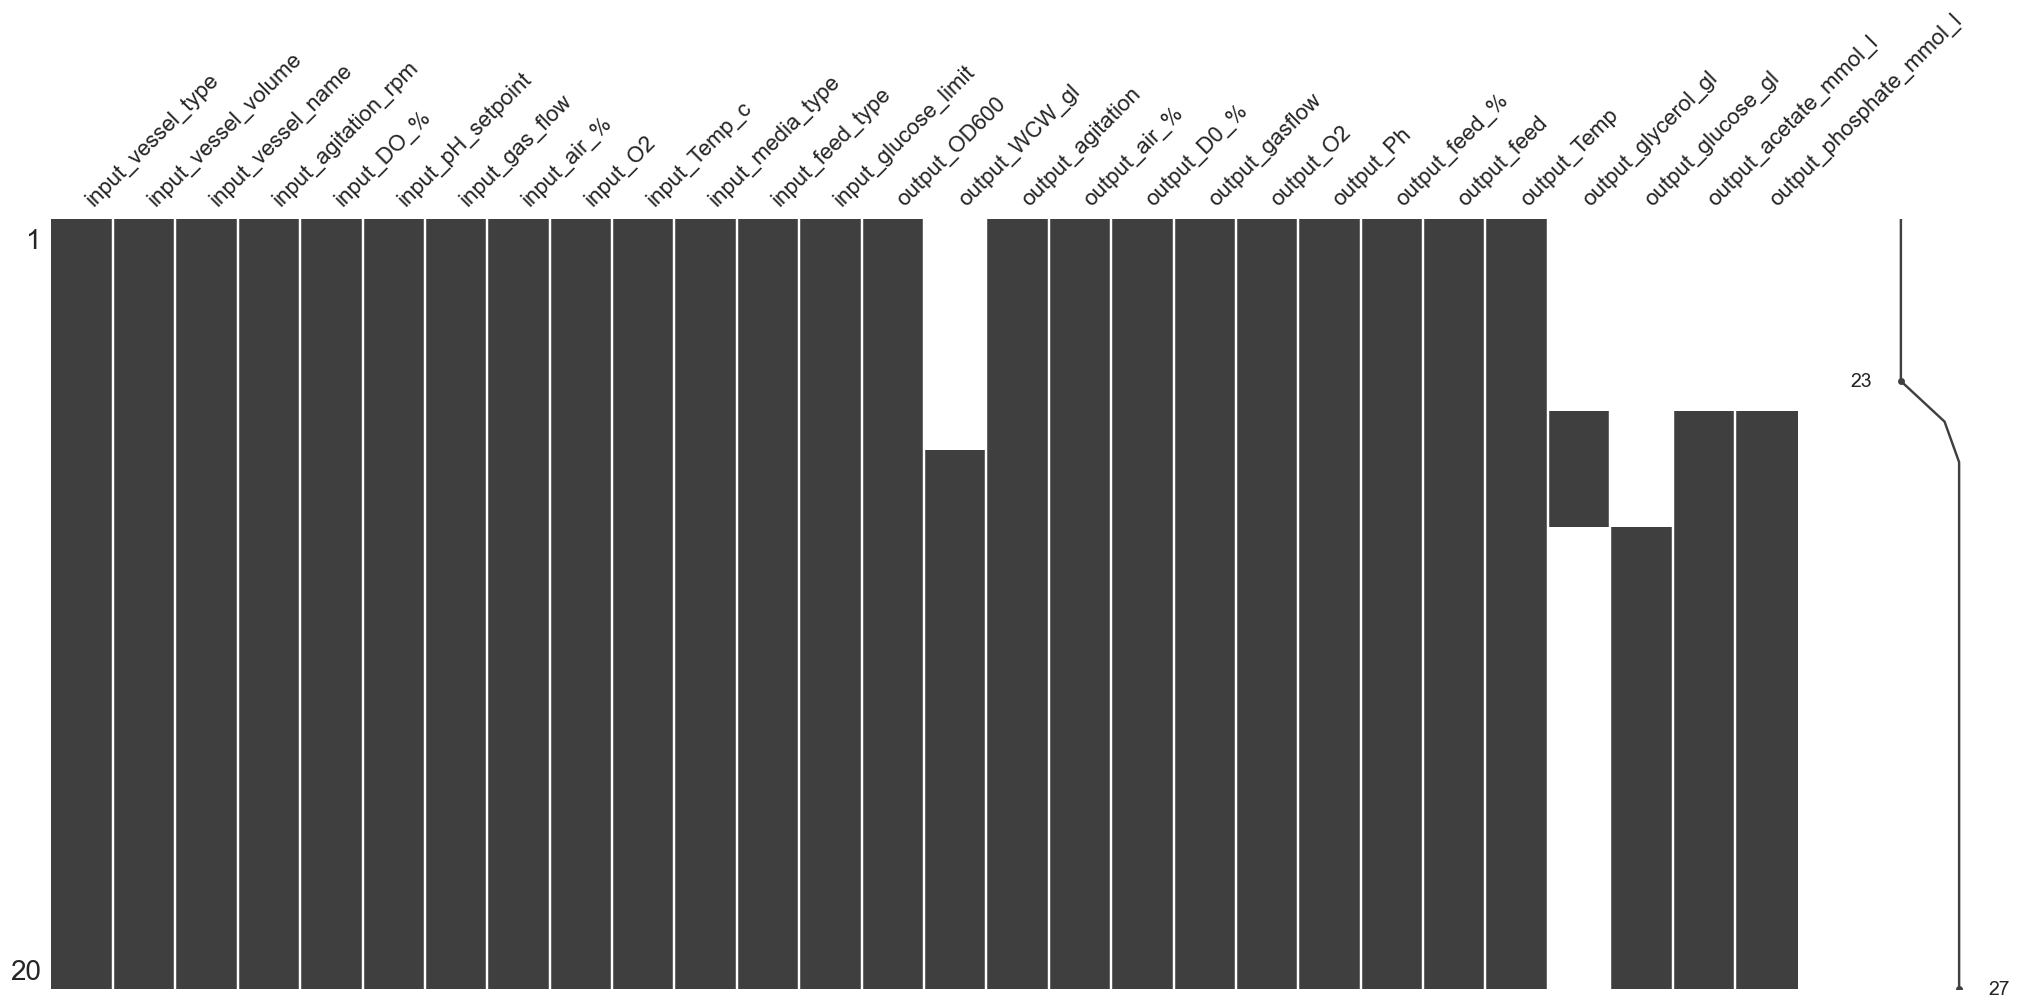

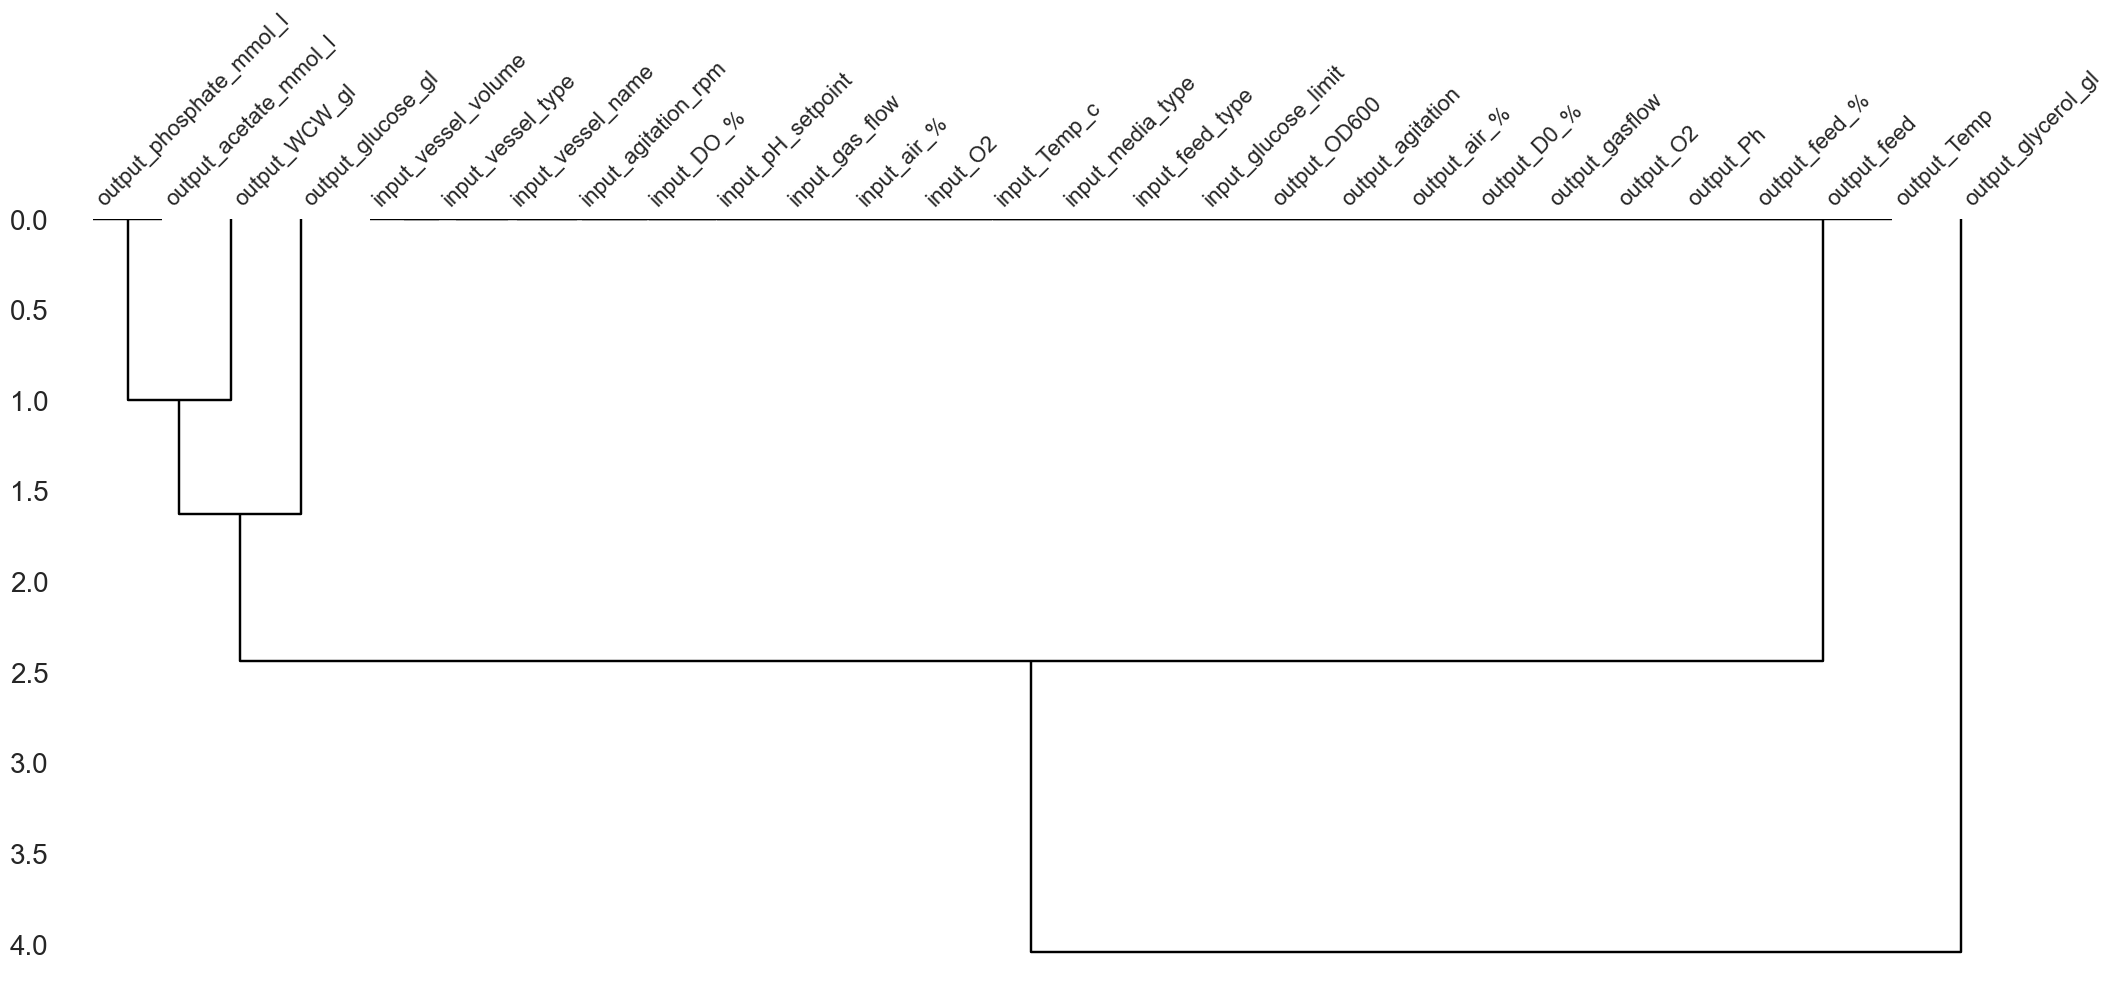

In [9]:
random_num = np.random.randint(0, len(experiment_data))


for index, df in enumerate(experiment_data):
    if random_num == index:
        print(f"Randomly selected experiment: {df.name}")
        print(df.head())
        print('------------------------------', '\n', 'Data Shape:', df.shape, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Columns:', df.columns, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Tpes:', df.dtypes, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Info:', df.info(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Description:', df.describe(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data NaN total:', df.isnull().sum(), '\n', '------------------------------', '\n')

        msno.matrix(df)
        msno.dendrogram(df)


> Check for and drop invariant columns

In [10]:
invariant_cols = ['input_vessel_type',	'input_vessel_volume',	'input_vessel_name',	'input_agitation_rpm',	'input_DO_%',	
                  'input_pH_setpoint',	'input_gas_flow',	'input_air_%',	'input_O2',	'input_Temp_c',	'input_media_type',	
                  'input_feed_type',	'input_glucose_limit']

random_num = np.random.randint(0, len(experiment_data))

for index, df in enumerate(experiment_data):
    if random_num == index:
        print(df.name) 
        invariant_cols_values = {col: df[col].unique() for col in experiment_data[1].columns 
                                 if len(experiment_data[1][col].unique()) < 4}

invariant_cols_values 

exp_220315c1_4


{'input_vessel_type': array(['5L Fermenter'], dtype=object),
 'input_vessel_volume': array(['5000ml'], dtype=object),
 'input_vessel_name': array(['Ferm4'], dtype=object),
 'input_agitation_rpm': array([700], dtype=int64),
 'input_DO_%': array([1], dtype=int64),
 'input_pH_setpoint': array([6.8]),
 'input_gas_flow': array([5], dtype=int64),
 'input_air_%': array([100], dtype=int64),
 'input_O2': array([0.]),
 'input_Temp_c': array([30], dtype=int64),
 'input_media_type': array(['Media type A'], dtype=object),
 'input_feed_type': array(['Glucose'], dtype=object),
 'input_glucose_limit': array([0], dtype=int64)}

In [11]:
# drop invariant columns 
use_this = [] * len(experiment_data)
for index, df in enumerate(experiment_data):
    df = df.drop(columns = invariant_cols, axis=1, inplace=True)


<a id="3"></a> <br>
## Exploratory Data Analysis (EDA)

In [14]:
# high_corr

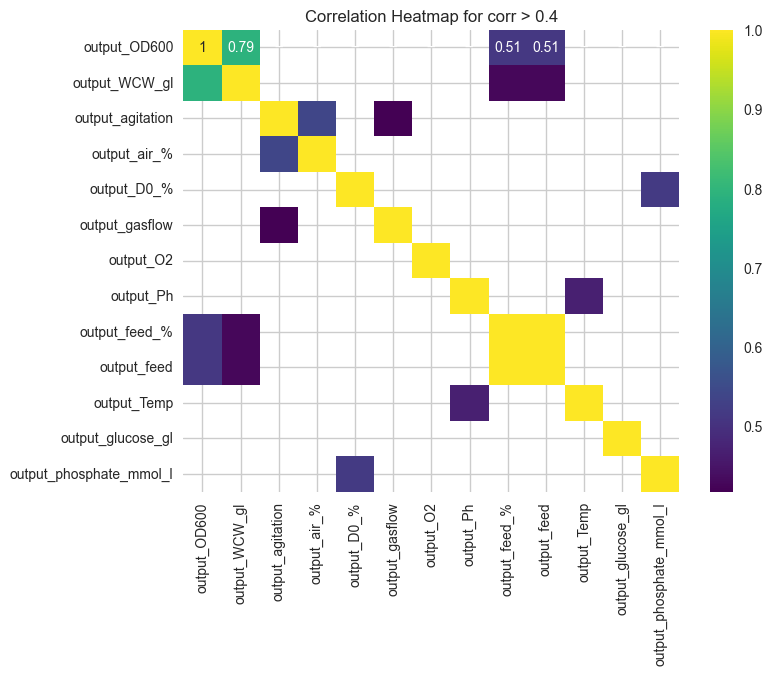

In [15]:
# plt.figure(figsize=(8, 6)) # Set the size of the plot

df_combined = pd.concat(experiment_data, axis=0)

def plot_corr_matrix(df, corr_val = 0.4, save=False):
    
    if hasattr(df, 'name') and df.name:
        title = f"{df.name} Correlation Heatmap"
    else:
        title = "Correlation Heatmap"
    
    corr_matrix = df.select_dtypes(exclude='object').corr()
    high_corr = corr_matrix.where(np.abs(corr_matrix) >= corr_val)   # Filter the matrix to keep only correlations with absolute value >= 0.4.
    high_corr[high_corr < corr_val] = np.nan    # Set the rest of the values to NaN
    
    plt.figure(figsize=(8, 6))  # Set the size of the plot
    sns.heatmap(high_corr, annot=True, cmap='viridis', annot_kws={"size": 10})    # Create a heatmap using seaborn library
    plt.title(f"{title} for corr > {corr_val}")    # Set the title of the plot
    if save:    # Save the plot if the 'save' parameter is True
        plt.savefig(f"images/correlation_plots/{title}.png")
    plt.show()
    
    
plot_corr_matrix(df_combined, corr_val = 0.4, save=False) 

In [16]:
# there are some columns that are highly correlated with each other, 

    # output_WCW has a moderate-high correlation with:
        # output_OD600 (high correlation ) 
        # output_feed and output_feed_% (moderate correlation)
        
    # output_OD600 has a moderate-high correlation with:
        # output_WCW (high correlation )
        # output_feed and output_feed_% (moderate correlation)
    
    # output_gasflow has a moderate relationship with:
        # output_air_% (moderate-high correlation)
        # output_agitation (moderate correlation)
             
    # output_air_% and output_agitation have a moderate/strong correlation with each other


In [17]:
## DO NOT DELETE

# for df in experiment_data:
#     plot_corr_matrix(df, corr_val = 0.5, save=False)


### Time Series Plots

> Feed Strategy

In [18]:
def plot_timeseries (experiment_groups, cols_to_plot, marker = '*' , linestyle='-', color=None, save = False):
    for output_col in cols_to_plot:
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

        for i, exp_dfs in enumerate(experiment_groups):
            for j, df in enumerate(exp_dfs):
                # Calculate row and column index for subplots
                row = i // 4  # Integer division to get the row index
                col = i % 4  # Modulus to get the column index

                # Plot the specified output column on the subplot
                try:
                    if df[output_col].isnull != True:
                        ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
                        ax[row, col].set_xlabel('Experiment Time (hr)')
                        ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                        
                        label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"

                        ax[row, col].legend()

                        # Use the DataFrame's 'name' attribute for the subplot title, if available
                        exp_name = getattr(df, 'name', f'Exp {i+1}')
                        ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
                
                except:
                    pass
        if save:
            plt.savefig(f"images/timeseries_plots/{output_col}_timeseries.png")
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for the current output column
        

# def plot_timeseries_df (experiment_groups, cols_to_plot, marker = '*' , linestyle='-', color=None, save = False):
#     for output_col in cols_to_plot:
#         fig, ax = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

#         for i, exp_dfs in enumerate(experiment_groups):
#             for j, df in enumerate(exp_dfs):
#                 # Calculate row and column index for subplots
#                 row = i // 4  # Integer division to get the row index
#                 col = i % 4  # Modulus to get the column index

#                 # Plot the specified output column on the subplot
#                 try:
#                     if df[output_col].isnull != True:
#                         ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
#                         ax[row, col].set_xlabel('Experiment Time (hr)')
#                         ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                        
#                         label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"

#                         ax[row, col].legend()

#                         # Use the DataFrame's 'name' attribute for the subplot title, if available
#                         exp_name = getattr(df, 'name', f'Exp {i+1}')
#                         ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
                
#                 except:
#                     pass
#         if save:
#             plt.savefig(f"images/timeseries_plots/{output_col}_timeseries.png")
#         plt.tight_layout()  # Adjust layout to prevent overlap
#         plt.show()  # Display the plot for the current output column

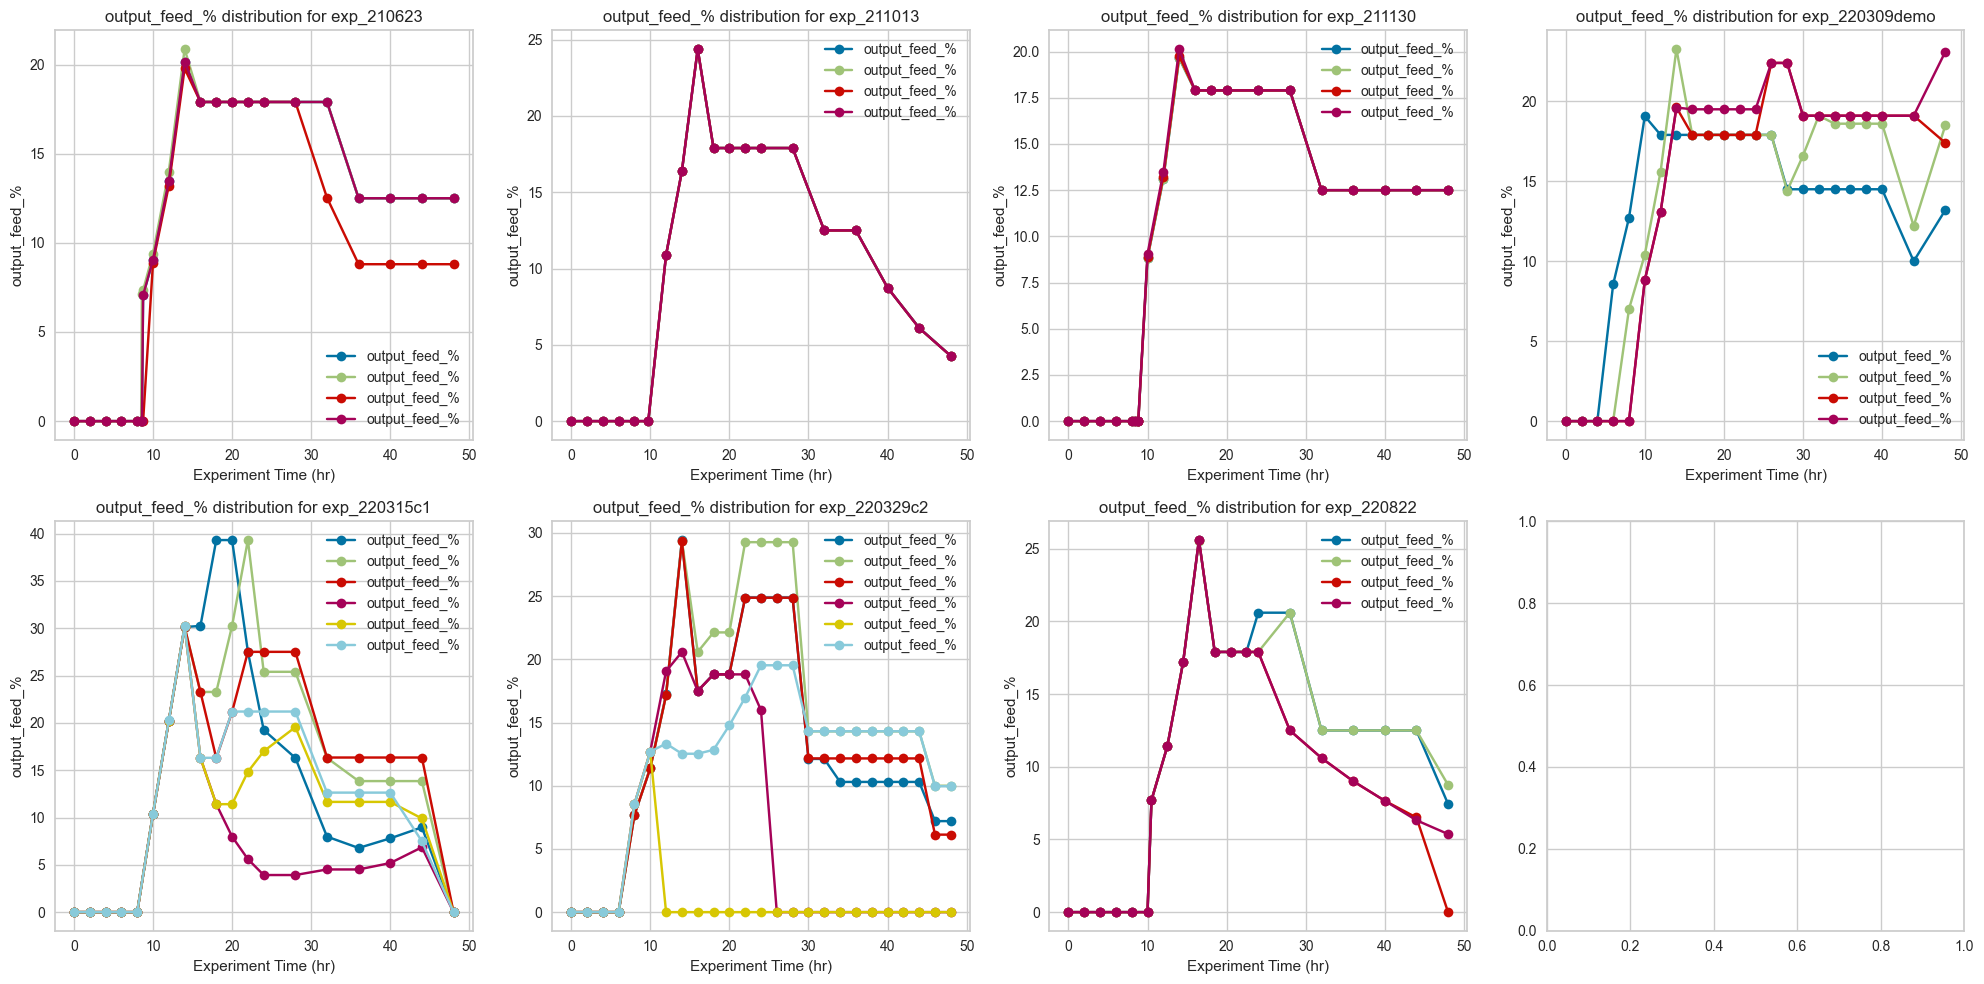

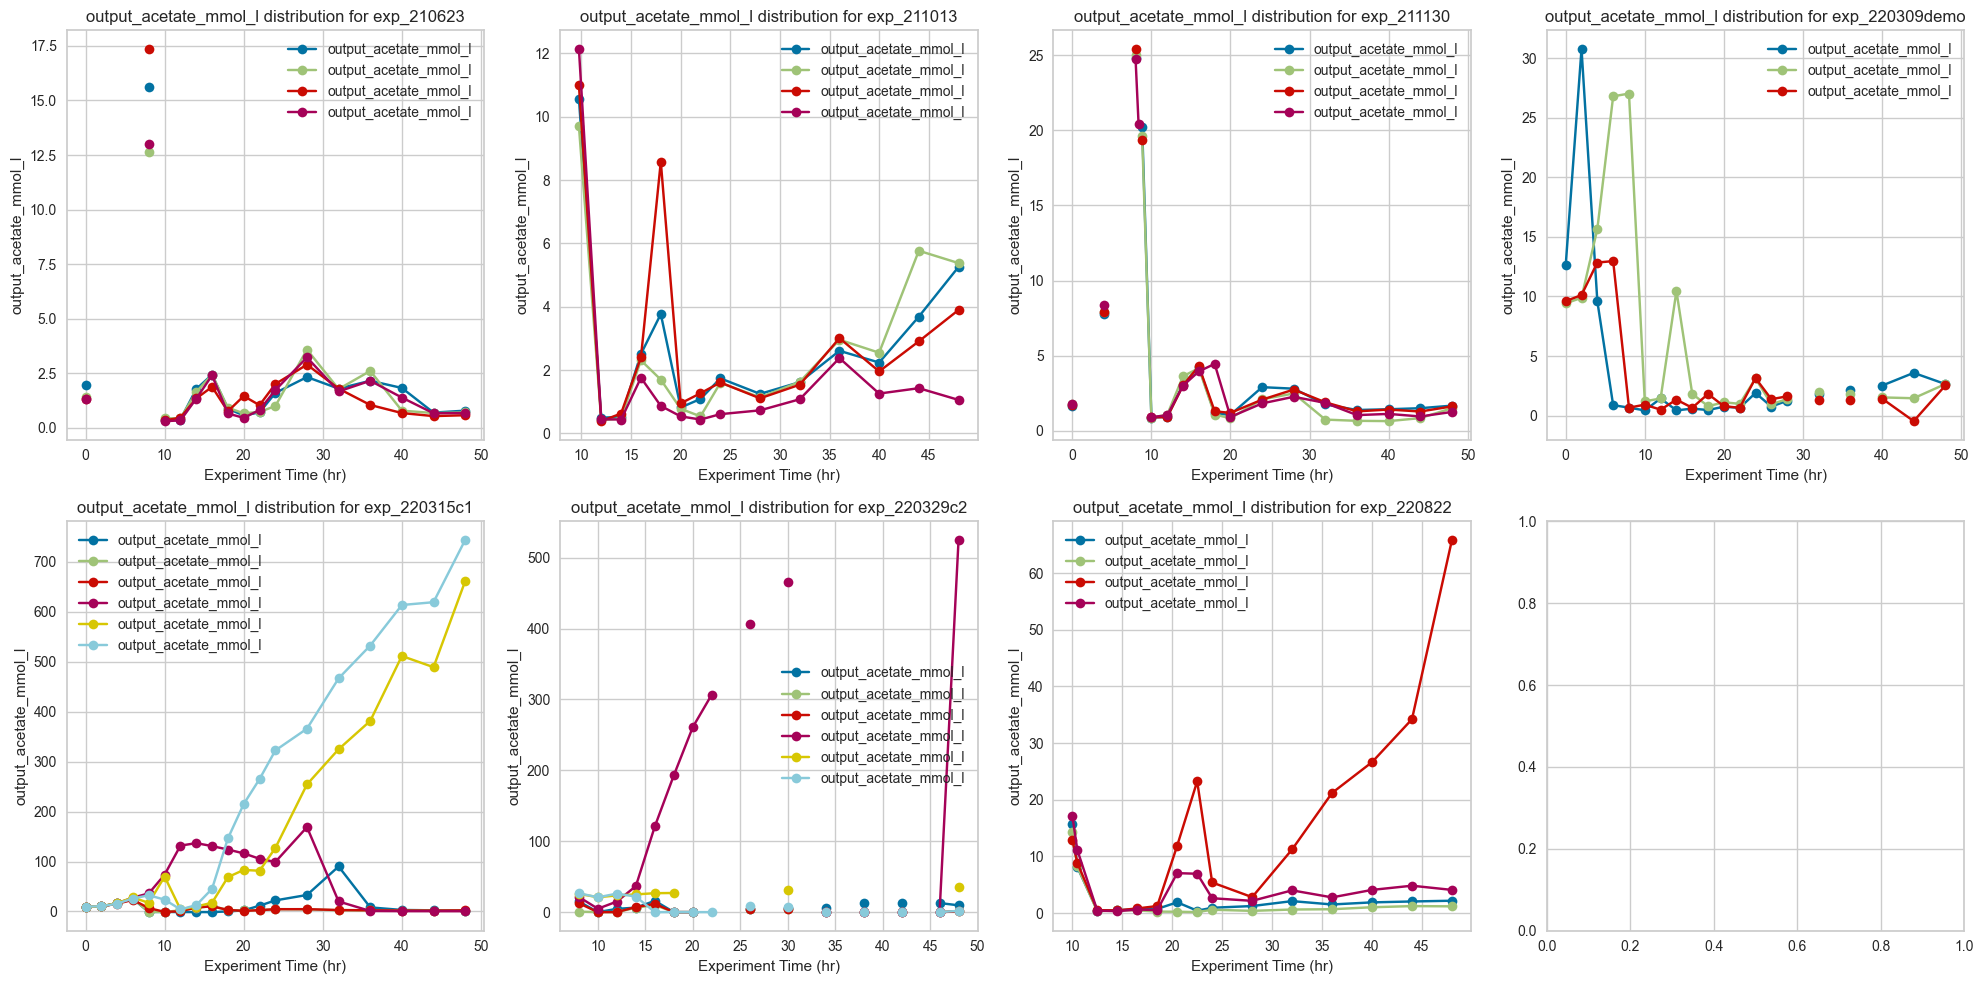

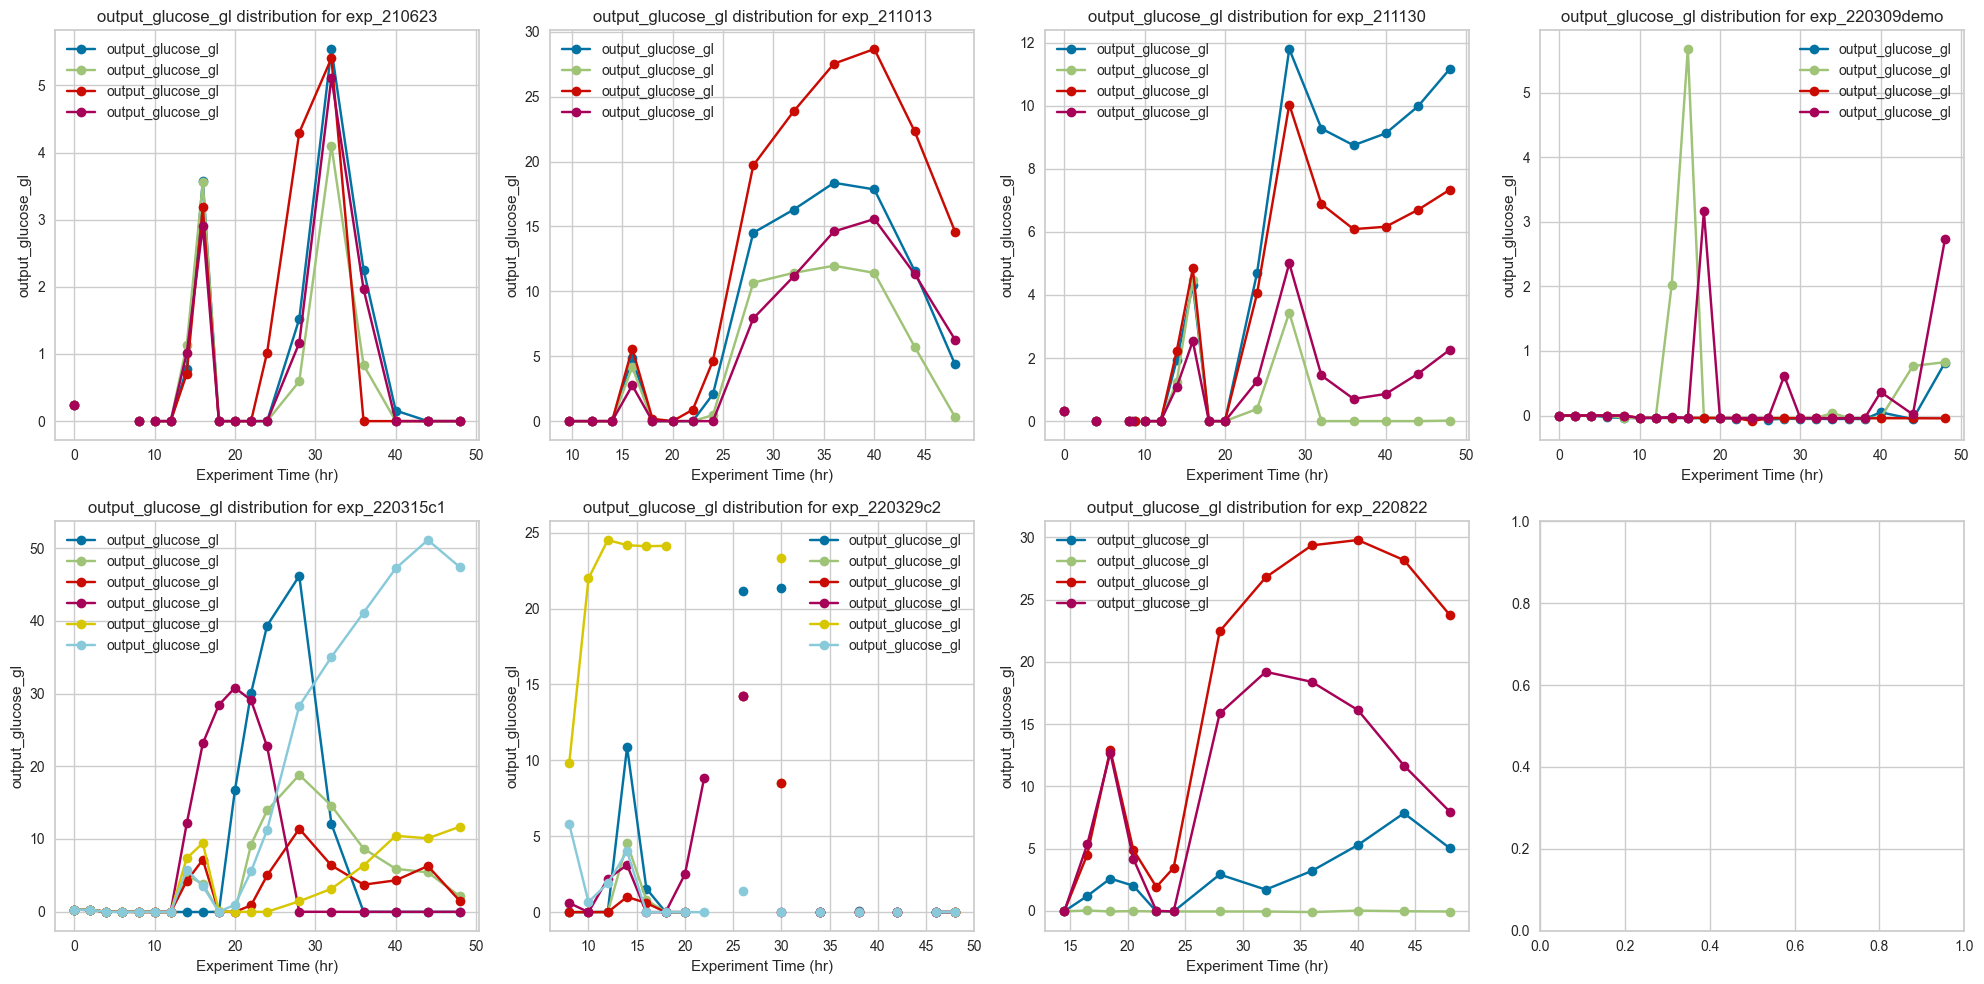

In [19]:
plot_timeseries(experiment_groups, ['output_feed_%', 'output_acetate_mmol_l', 'output_glucose_gl'], marker = 'o', linestyle='-', color=None, save = False)


In [20]:
# df_combined.isnull().sum()

In [21]:
# # 1.      Feed Changes: 

#             # a. Composition of Feed: 
#                 # Other than glucose, are there any other components included in the feed at each time point? If so, what are they 
#                 # and what proportions are used? 

#                     Ans: No, only 50% glucose solution. 

#             # b. Decision Factors for Feed Changes: 
#                 # Could you describe the criteria or factors that inform how the feed percentage is adjusted throughout the experiment? 
#                 # For instance, what prompts a change from 10.6% to 20.21%, and then to 7.9% at the specified hours? 

#                     Ans: Acetate production above 5mmol/L and would like to keep the glucose less than 5g/L. 

#             # c. Feed Calculation Variables: 

#                 # i. How exactly is the 'feed' variable quantified? Is it measured in volume, weight, or concentration? 

#                      Ans: Feed rate ml/min, Feed rate ml/min;  measured in concentration. Feed is measured using a Cedex to provide 
#                      concentration of glucose(g/L). The feed rate(mL/min)  is set as a  in percentage (%) for our pumps. 
#                      It's calculated from a ratio, as explained in c ii.. Using #14 tubing the rate is 3.4mL/min at 100%. 
#                      If you want the feed at say 1mL/min...3.4/100=1/x; x=29.4%, The pump would be set at 29.4%. 

#                 # ii. How is the 'feed %’ calculated? Is it relative to the batch volume, or another metric? 

#                     Ans: 3.4 ml/min at 100%, do ratio. 

#                 # iii. The input data shows that ‘Glucose’ is the only feed type. However, the output section has both columns 
#                     # for ‘glucose (g/L)’ and ‘feed’, which could mean that glucose is one of the many components of the feed. 
#                     # Could you share other components of the feed and their proportions? 

#                     Ans: No other components. 

In [22]:
[df.columns for df in experiment_data][1]

Index(['output_OD600', 'output_WCW_gl', 'output_agitation', 'output_air_%', 'output_D0_%', 'output_gasflow', 'output_O2', 'output_Ph', 'output_feed_%', 'output_feed', 'output_Temp', 'output_glycerol_gl', 'output_glucose_gl', 'output_acetate_mmol_l', 'output_phosphate_mmol_l'], dtype='object')

> Optical Density (OD600nm) and Wet Cell Weight (WCW_gl)

In [23]:
# Optical Density at 600 nm (OD600):

    # OD600 measures the turbidity or cloudiness of a microbial culture by assessing the light absorption at 600 nm wavelength. 
    # This is a rapid and non-destructive method to estimate the cell density in the culture.
    
    # An increase in OD600 typically indicates cell growth, and by extension, it can be inferred that there's ongoing protein production 
    # if the cells are engineered to express a recombinant protein. However, OD600 doesn't directly measure protein expression; 
    # it simply provides an estimate of the culture's cell density.
    
    # OD600 is particularly useful for determining the appropriate time to induce protein expression in inducible expression systems 
    # and for ensuring reproducibility between cultures by standardizing the cell density at the time of induction.


# Wet Cell Weight (WCW):

    # WCW is measured by collecting a known volume of culture, centrifuging it to pellet the cells, and then weighing the wet pellet 
    # after removing the supernatant. It provides a direct measure of the biomass produced in the culture.
    
    # Similar to OD600, WCW is an indirect measure of recombinant protein production. An increase in WCW indicates cell growth, 
    # which under the right conditions, correlates with an increase in recombinant protein production.
    
    # WCW can be particularly useful for processes that are scaled up for industrial production, where biomass yield can directly 
    # impact downstream processing and overall yields of the desired protein.

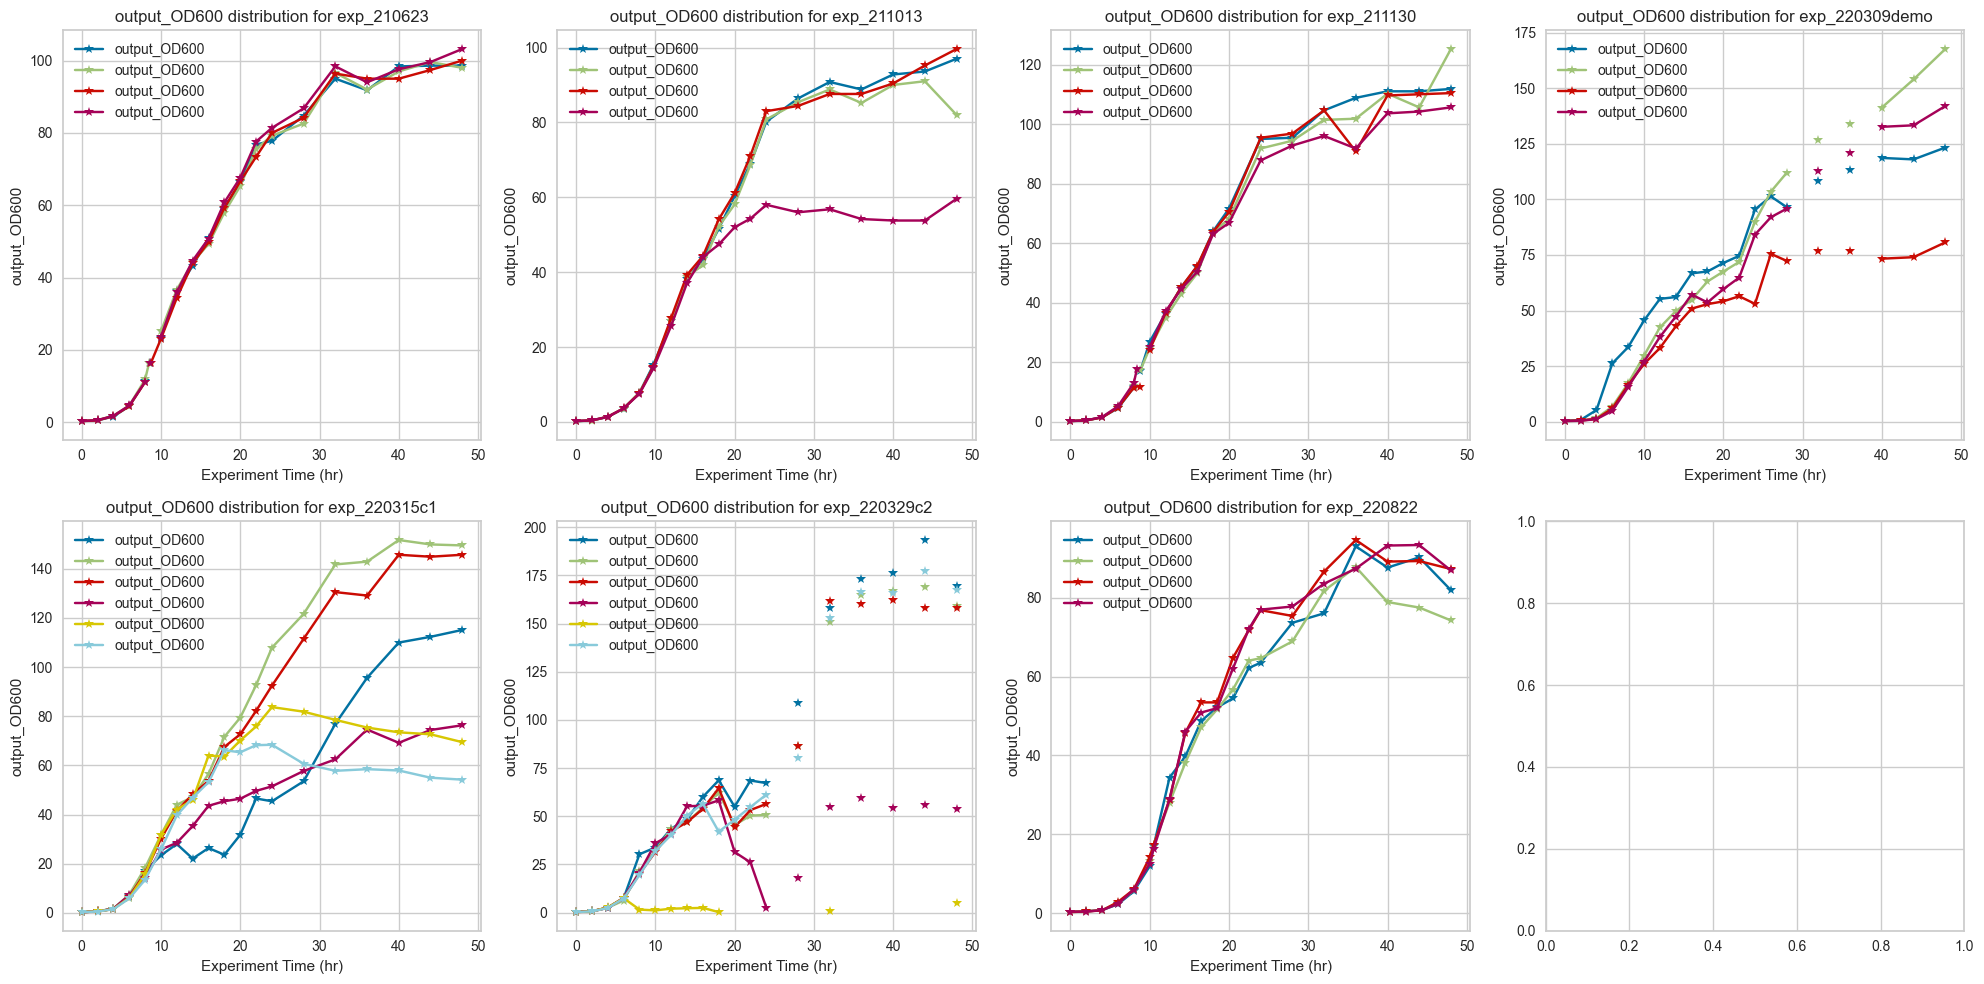

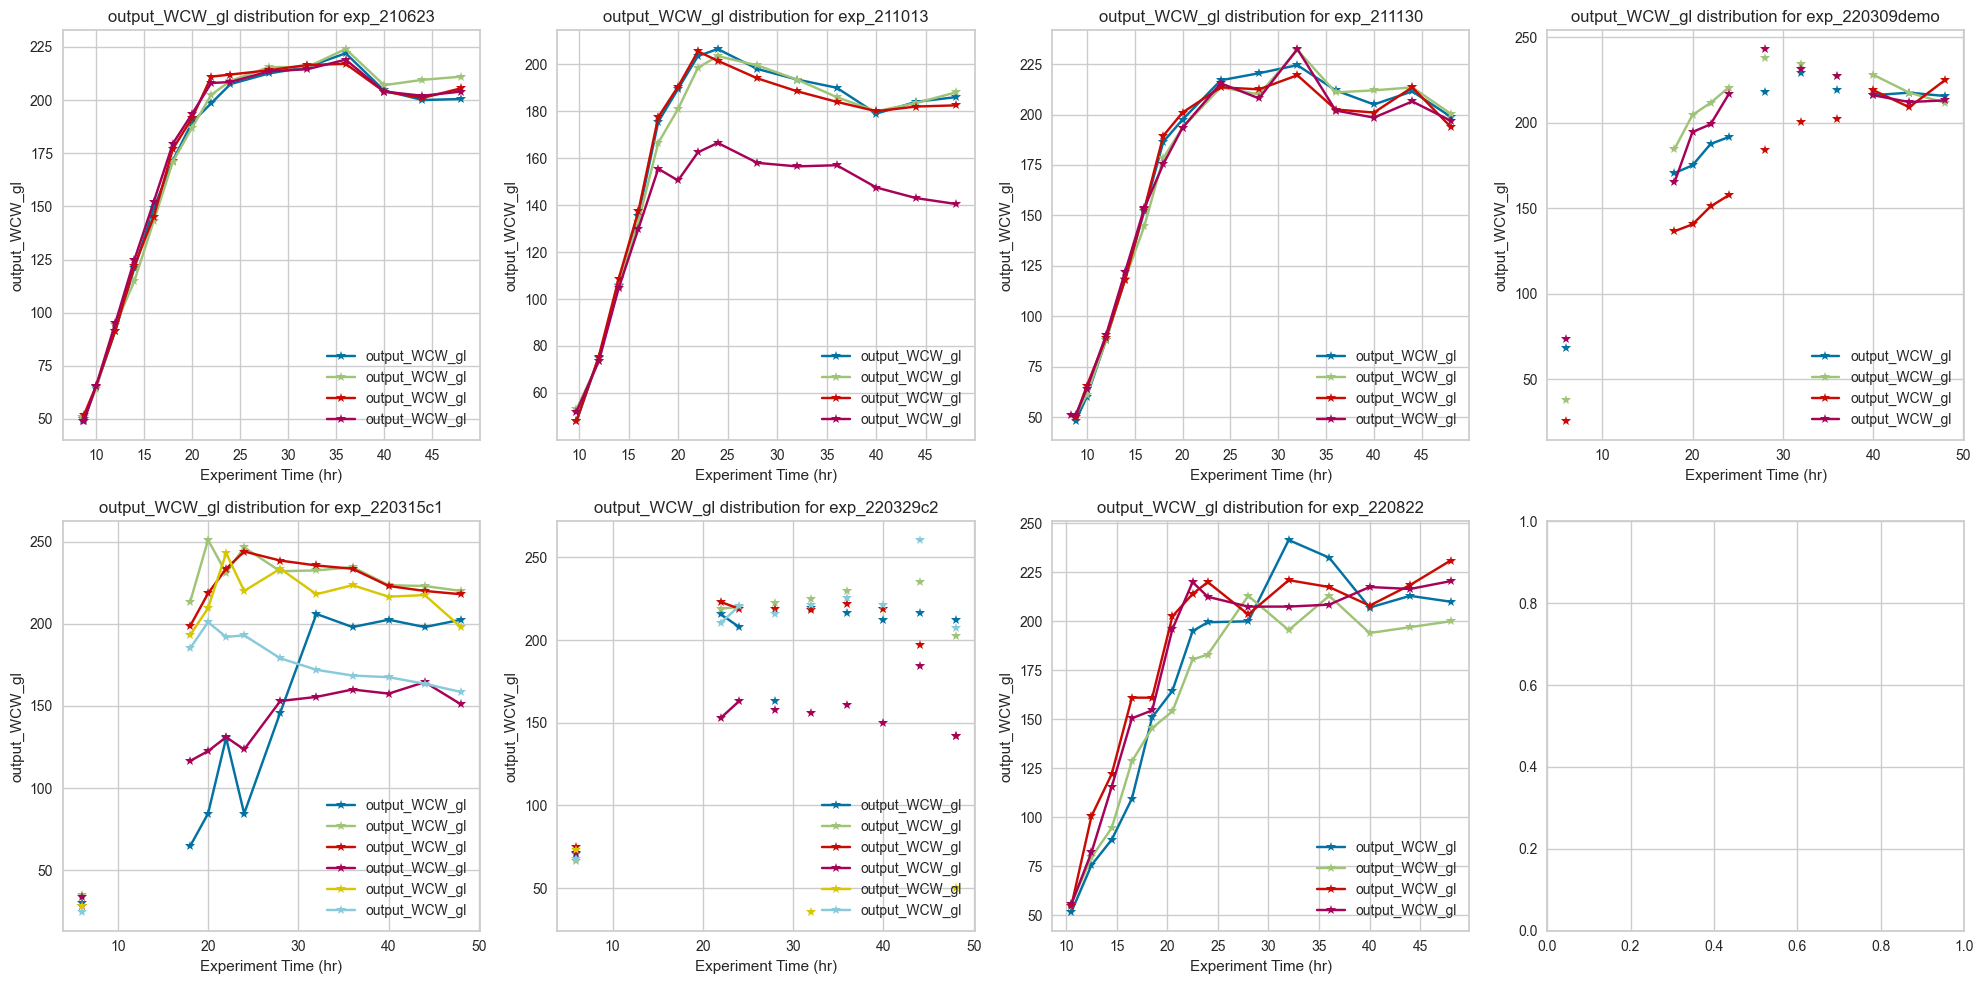

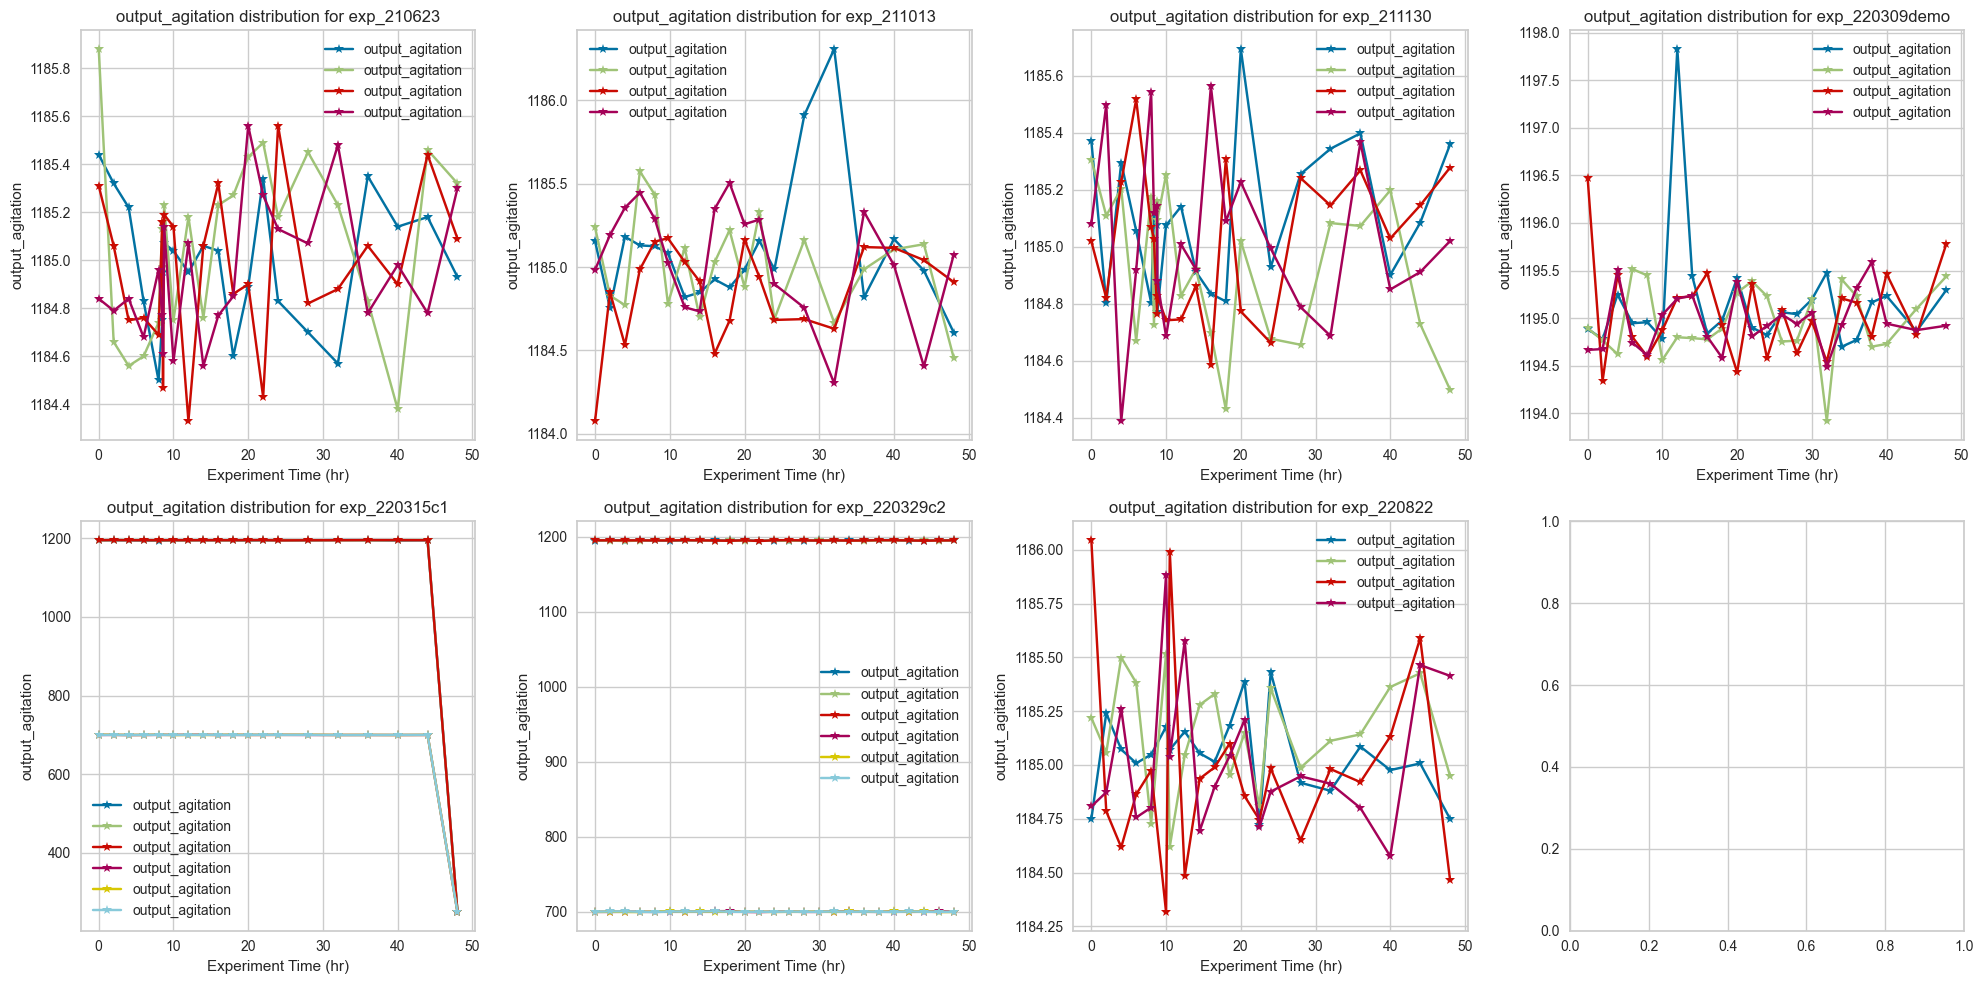

In [24]:
import matplotlib.pyplot as plt

# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['output_OD600', 'output_WCW_gl', 'output_agitation']

plot_timeseries(experiment_groups, output_columns, save = False)


> Nutrients Concentrations and its impact on Protein Production (OD600, WCW_gl)

In [25]:
# output_glucose_gl (Glucose concentration): 
    # As a primary carbon source, glucose availability directly affects cell growth and energy metabolism. However, excessive glucose 
    # can lead to undesirable by-products like acetate in E. coli, which can inhibit growth and protein production.
    
# output_glycerol_gl (Glycerol concentration): 
    # Glycerol can be used as an alternative carbon source in some fermentation processes, influencing cell growth and protein expression 
    # differently than glucose.

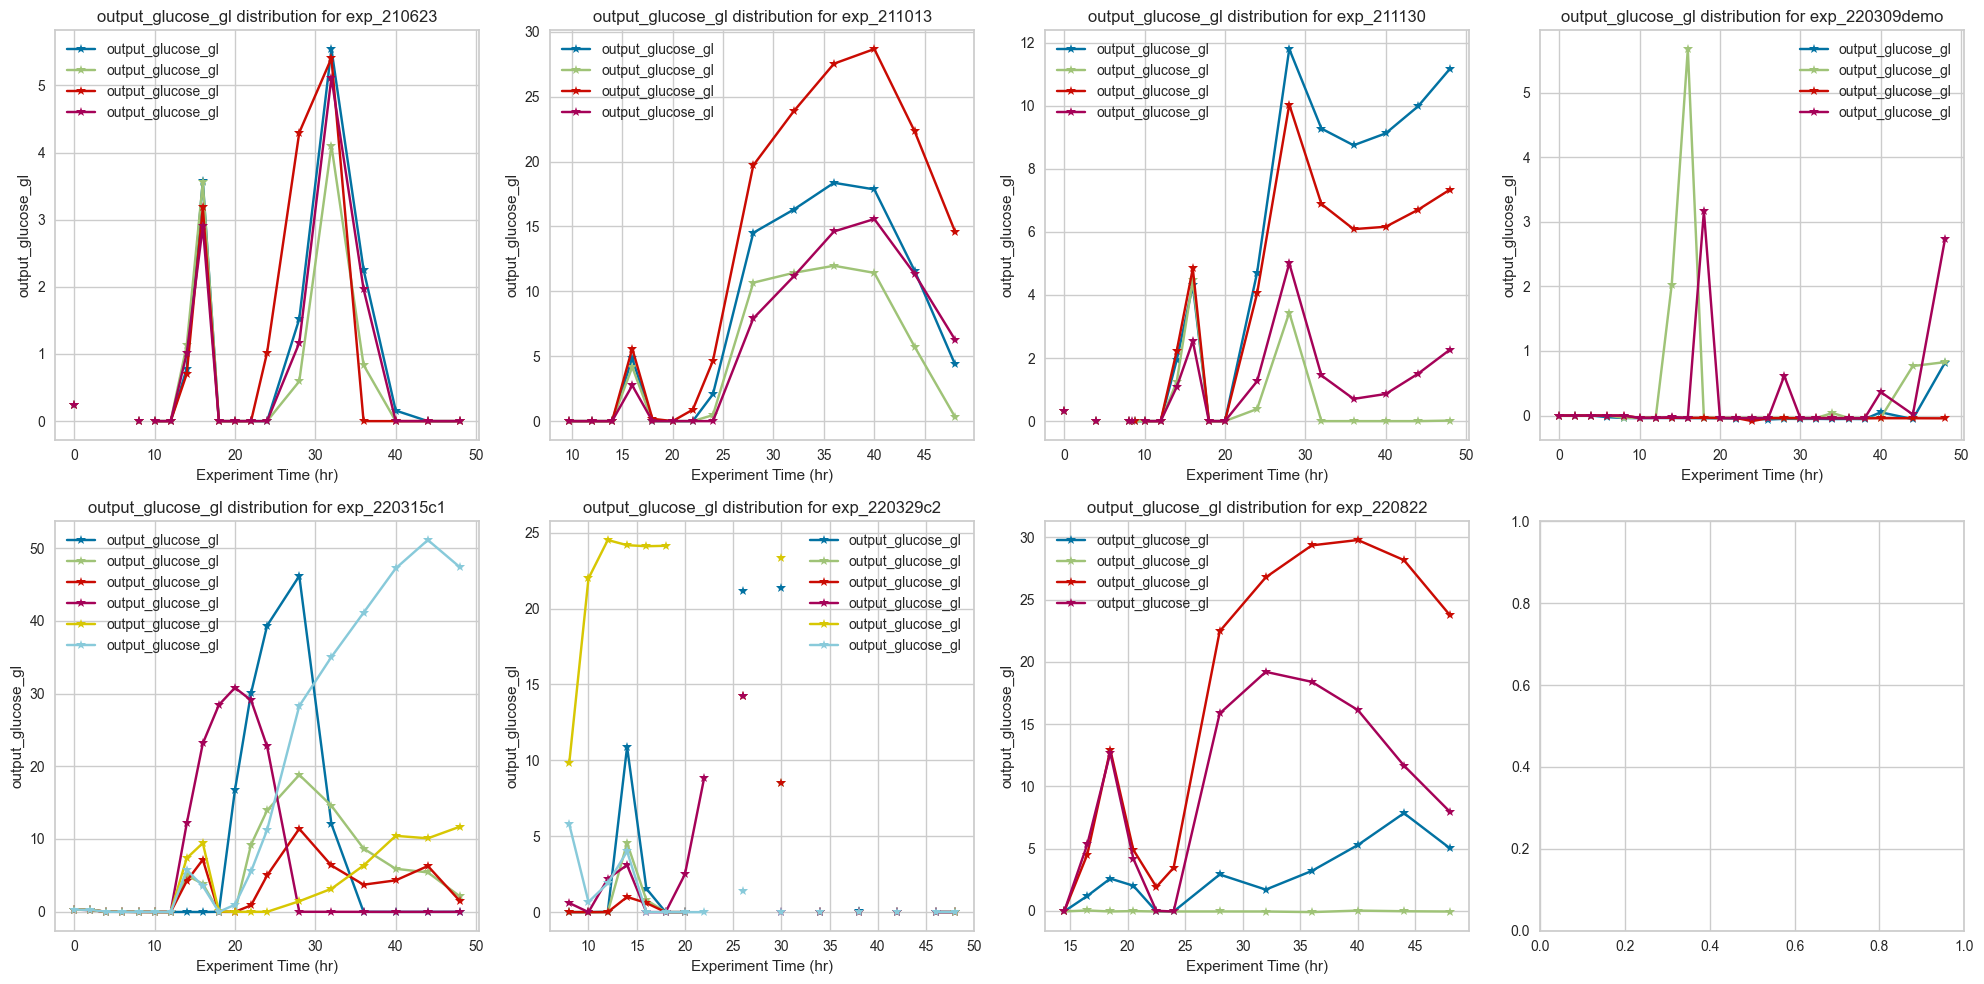

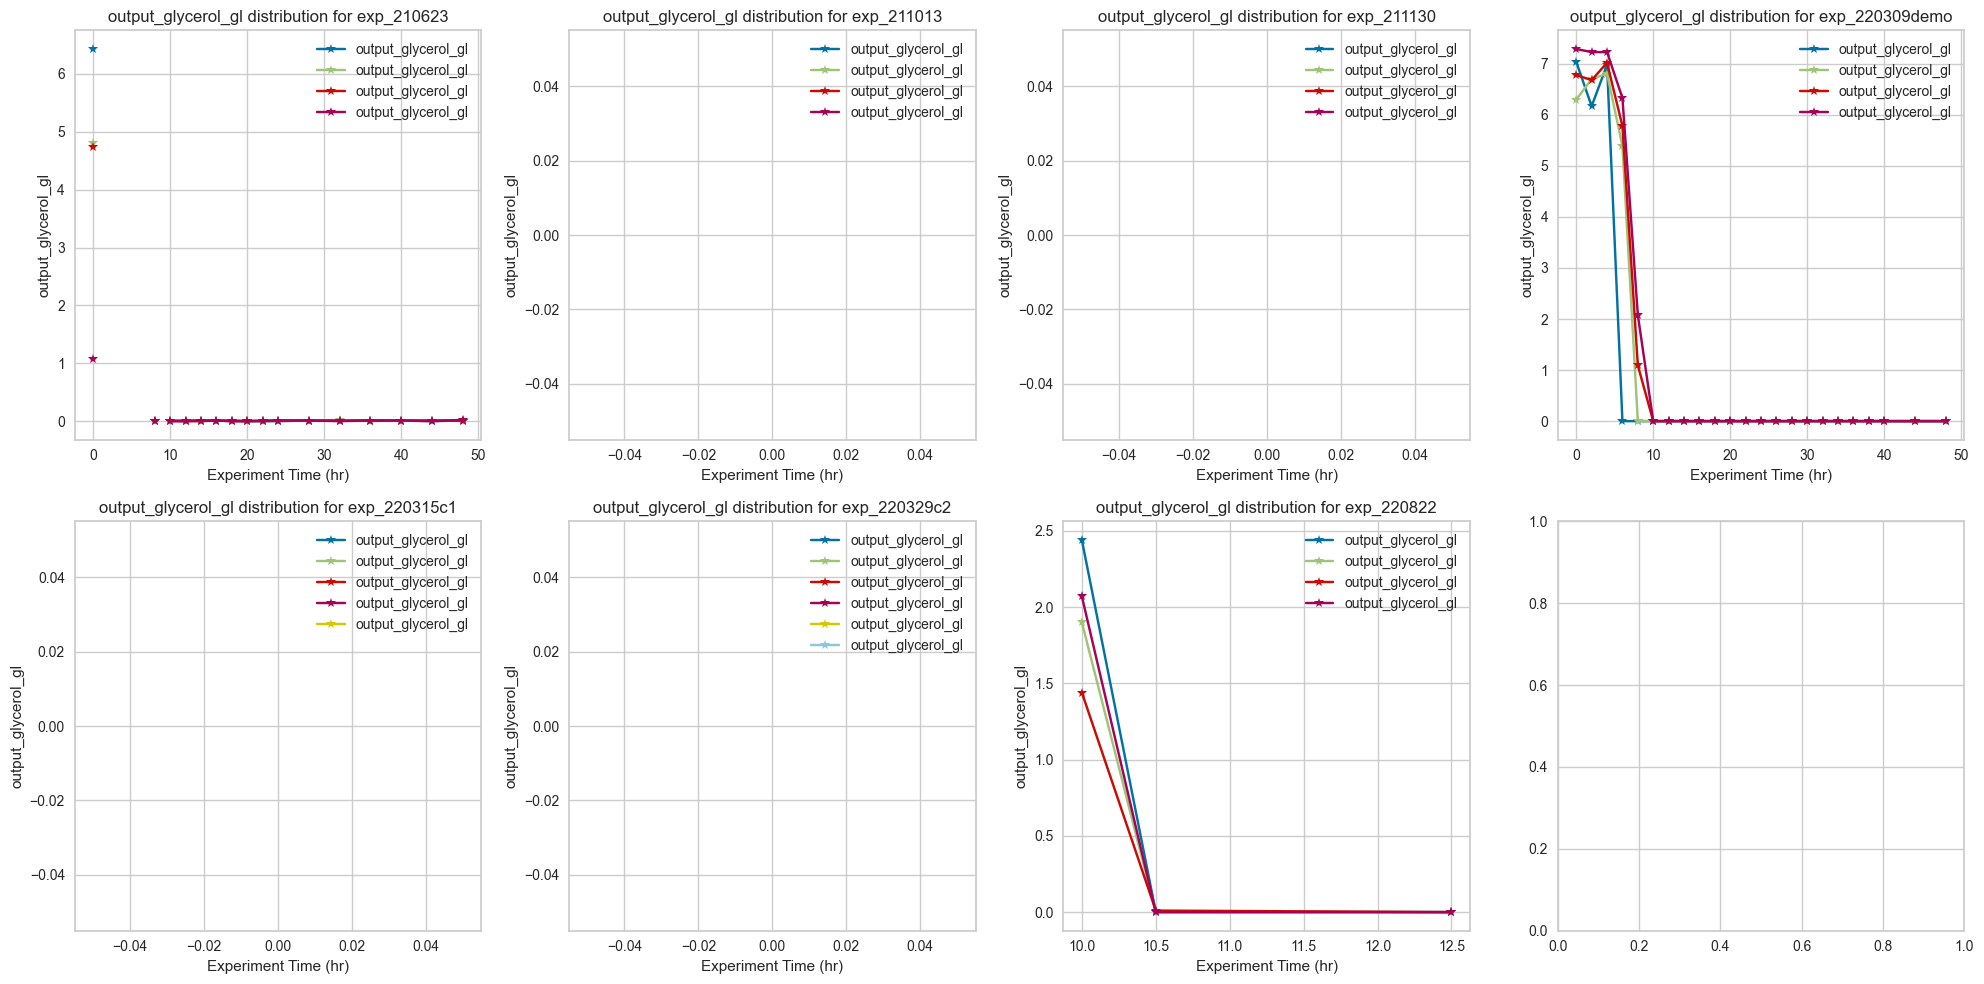

In [26]:
# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['output_glucose_gl', 'output_glycerol_gl']

plot_timeseries(experiment_groups, output_columns, save= False)

>       Error in glucose concentration for exp_220329c2

> Environmental Conditions:

In [27]:
# output_Temp (Temperature): 
    # Temperature profoundly influences cellular metabolism, protein folding, and the stability of the expressed protein. 
    # Optimal temperatures can enhance protein yield and functionality.
    
# output_Ph (pH): 
    # The pH of the culture medium affects enzyme activity, protein stability, and cell growth. Maintaining an optimal pH is crucial 
    # for maximizing protein production.
    
    # The pH scale is a numerical scale used to specify the acidity or basicity of an aqueous solution. It ranges from 0 to 14, 
    # with 7 being neutral. Solutions with a pH less than 7 are acidic, and those with a pH greater than 7 are basic (or alkaline).

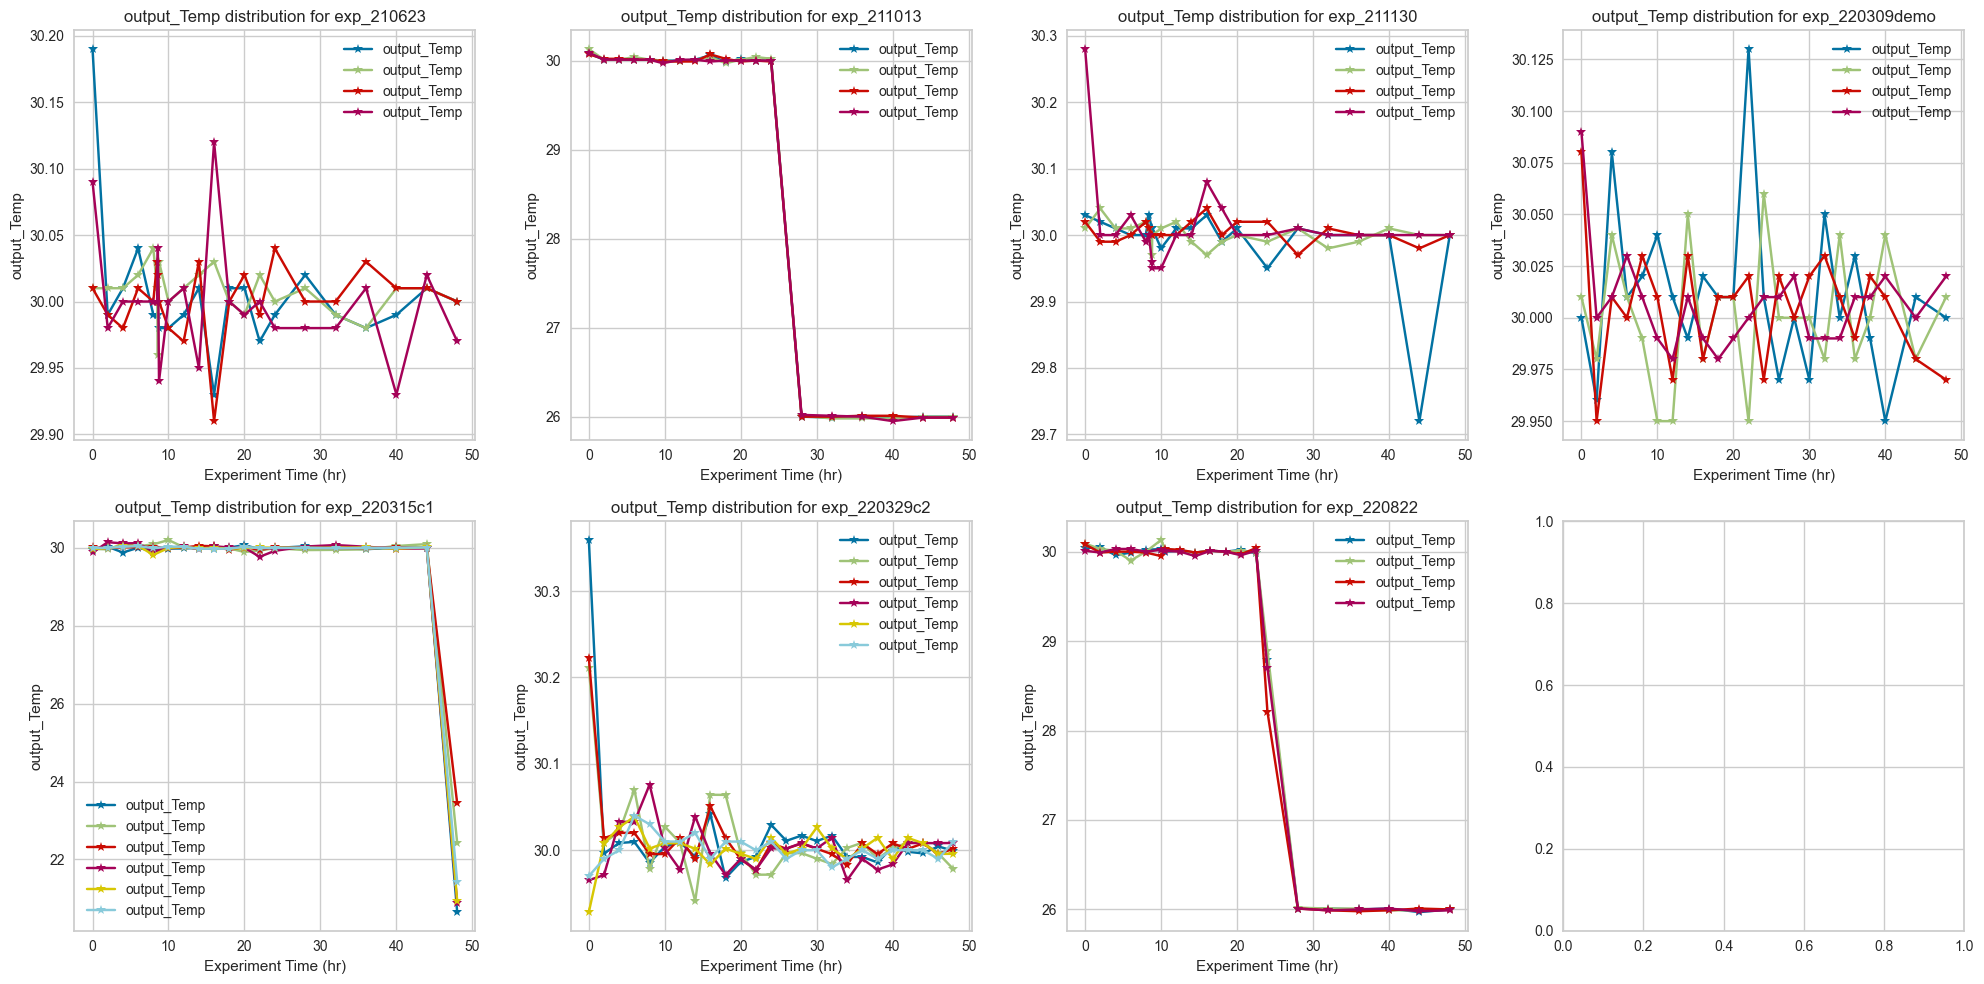

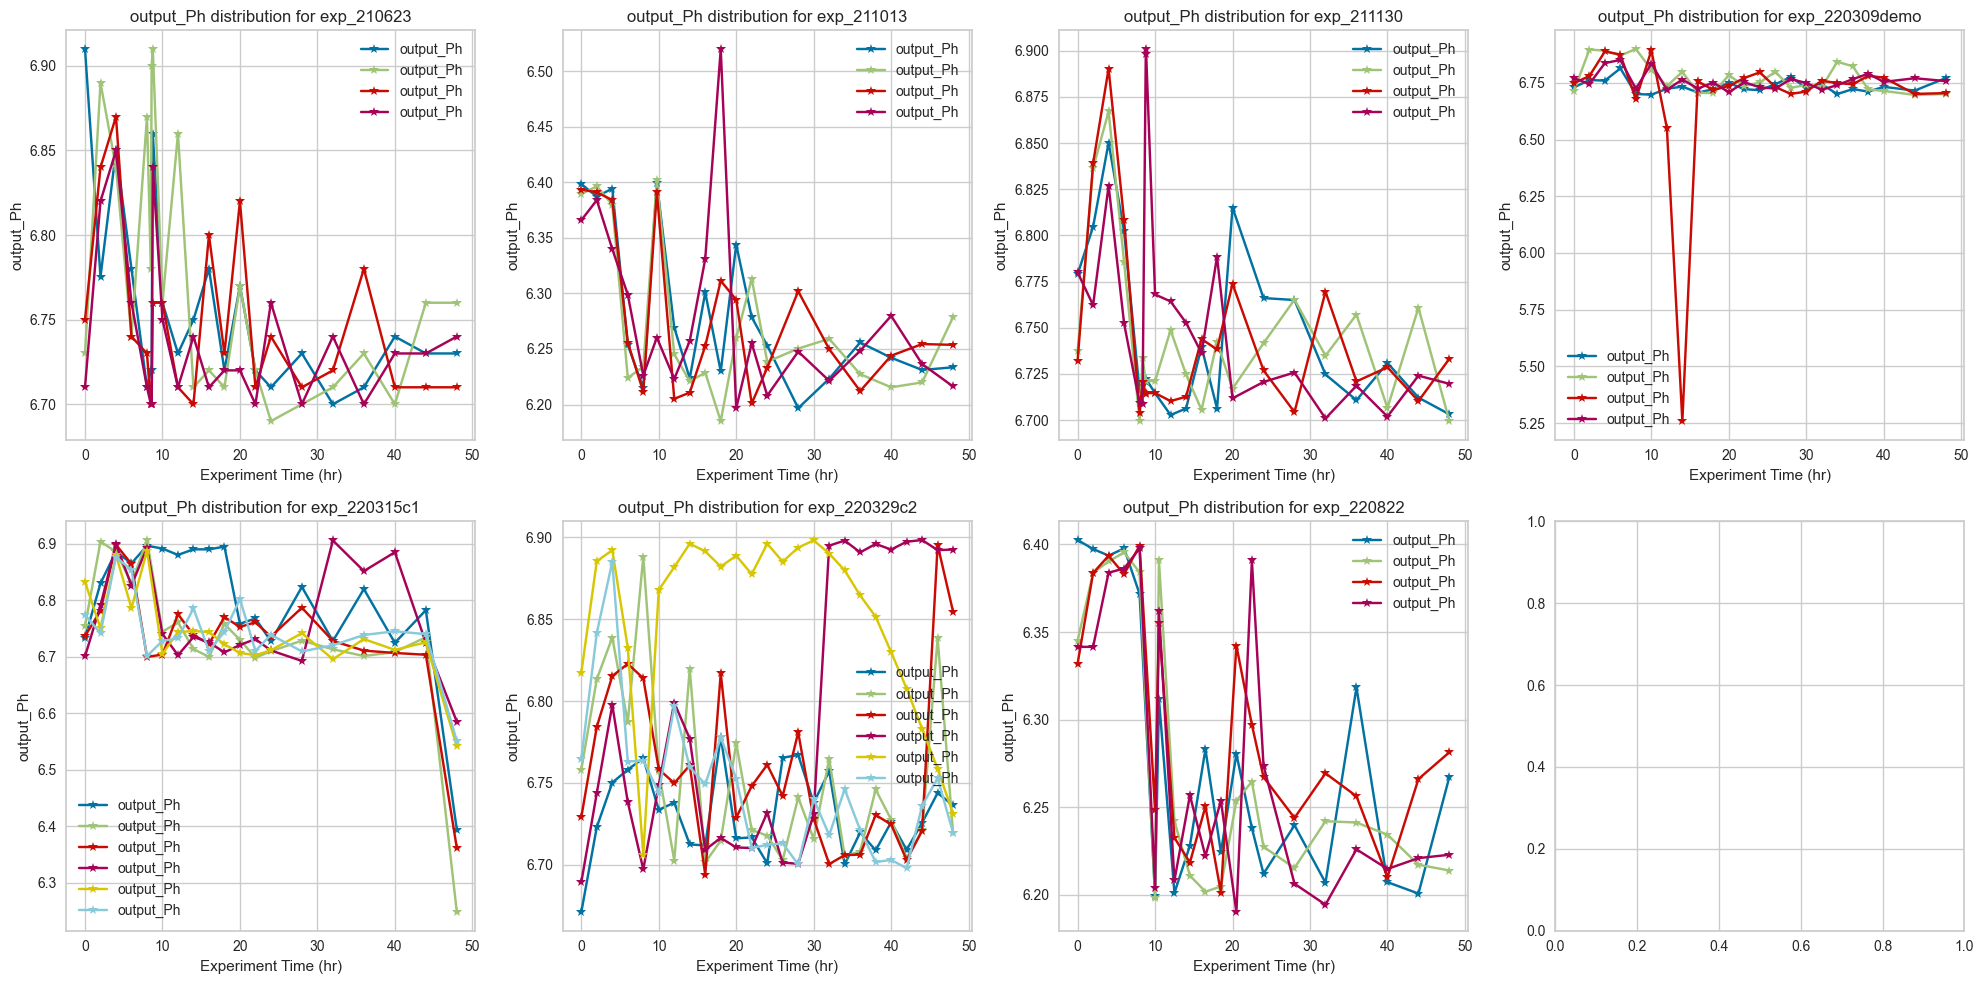

In [28]:
env_cols = ['output_Temp', 'output_Ph']

plot_timeseries(experiment_groups, env_cols, save = False) 

> Nutrients

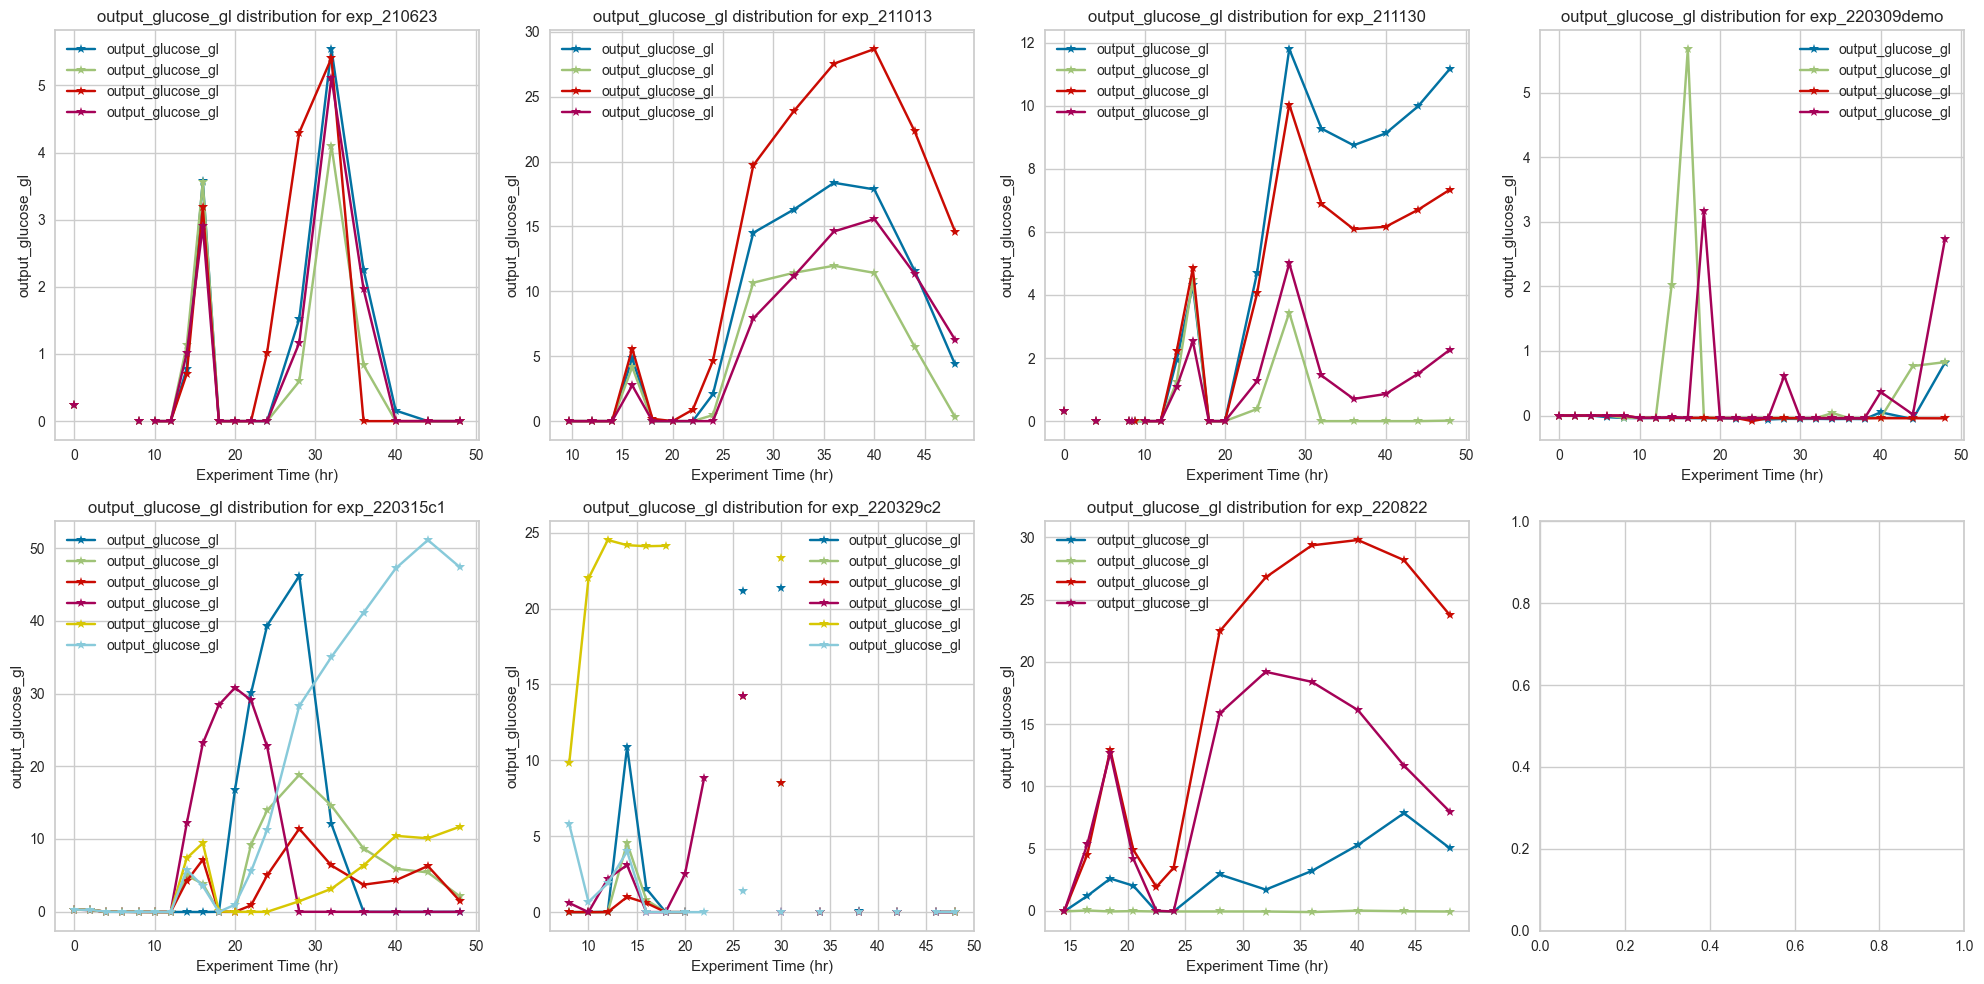

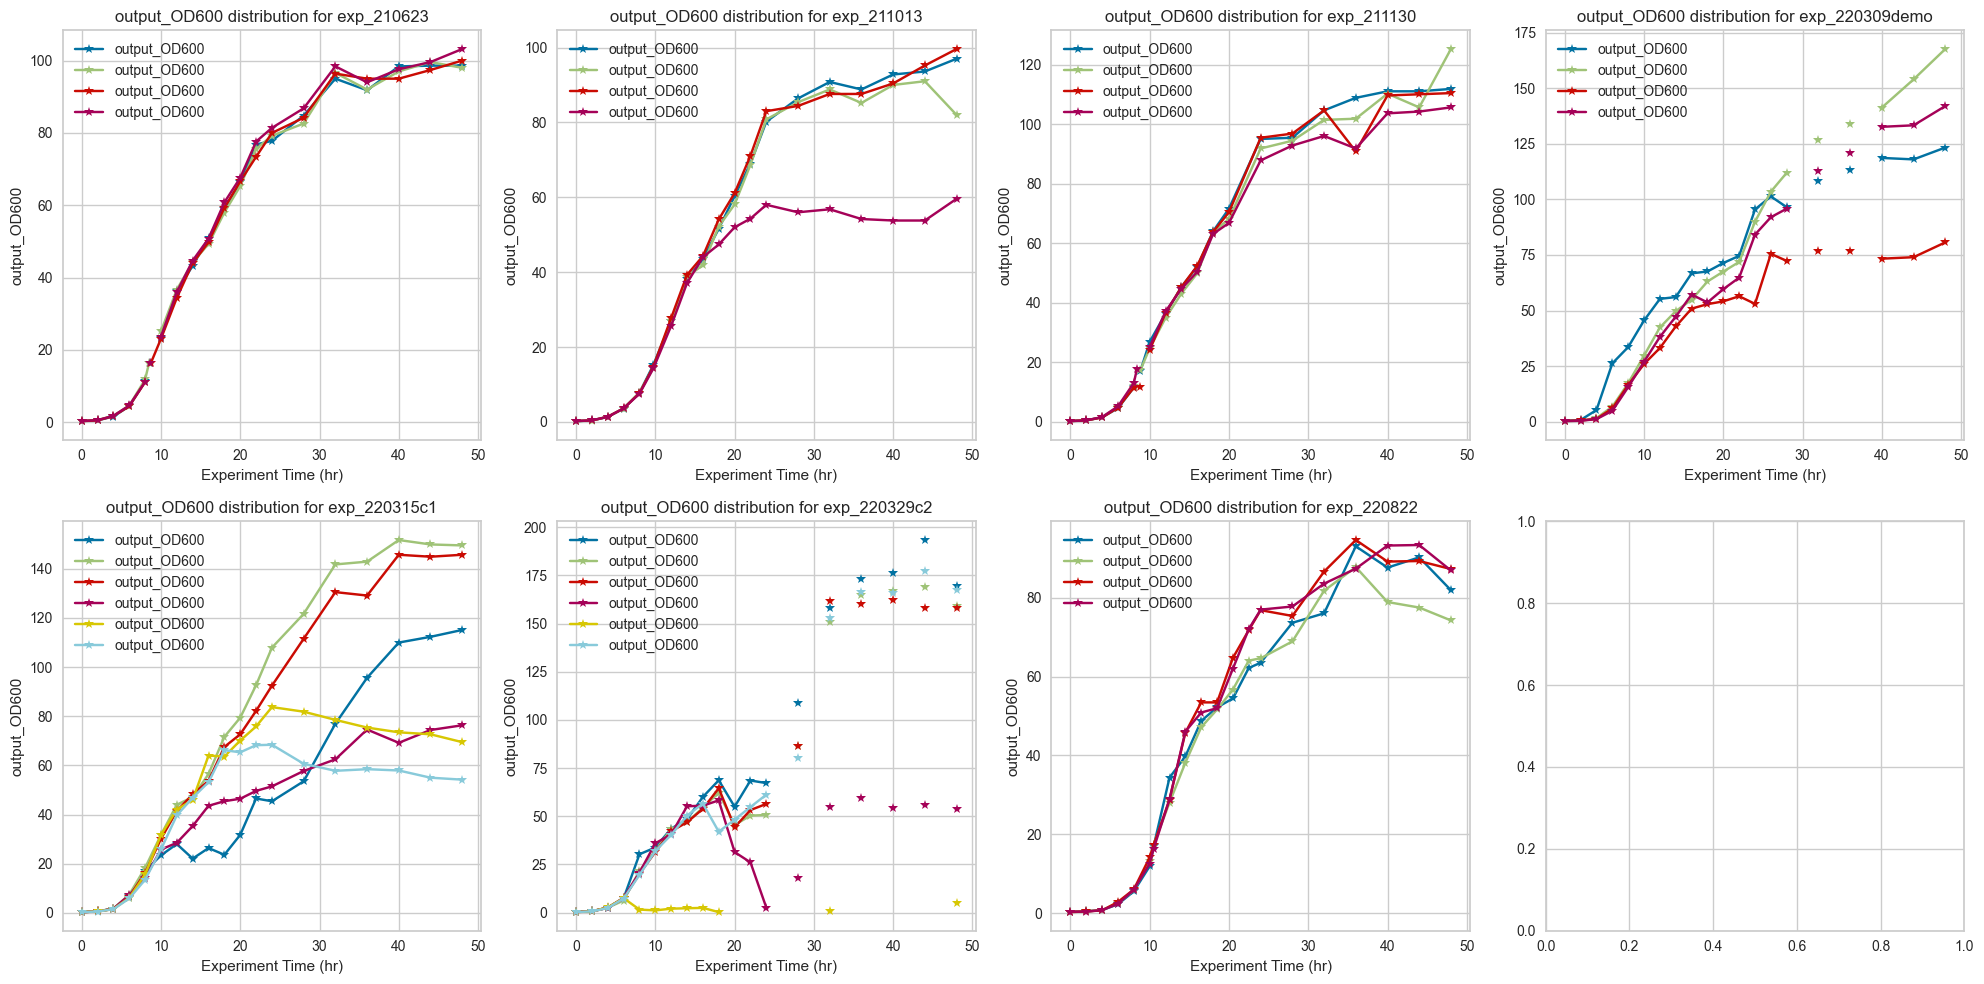

In [29]:
env_cols = ['output_glucose_gl', 'output_OD600']

plot_timeseries(experiment_groups, env_cols, save = False)

>> EDA on two batch categories

In [32]:
# [df.columns for df in df_c1c2][0]

In [33]:
c1c2_batches = [ 'exp_220315c1_1', 'exp_220315c1_2', 'exp_220315c1_3', 'exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
                'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6',]

# def load_batch (experiments):
#     # Load the data
#     df_list = pd.DataFrame()
#     if isinstance(experiments, list):
#         for exp in experiments:
#             df = pd.read_csv(f"data/final_cleaned/{exp}.csv", index_col='input_Timepoint (hr)', parse_dates=True)
#             df_list = pd.concat([df_list, df], axis = 0)
        
#     else:
#         df_list = pd.read_csv(f"data/final_cleaned/{experiments}.csv", index_col='input_Timepoint (hr)', parse_dates=True)
    
#     df_list.drop(columns = invariant_cols, axis=1, inplace=True)
#     return df_list

def plot_timeseries_list (experiment_data, cols_to_plot, marker = '*' , linestyle='-', color=None, save = False):
    for output_col in cols_to_plot:
        fig, ax = plt.subplots(3, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

        for i, df in enumerate(experiment_data):
            # Calculate row and column index for subplots
            row = i // 4  # Integer division to get the row index
            col = i % 4  # Modulus to get the column index

            # Plot the specified output column on the subplot
            try:
                if df[output_col].isnull != True:
                    ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
                    ax[row, col].set_xlabel(f"Experiment Time (hr) for {df.name}")
                    ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                    
                    label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"

                    ax[row, col].legend()

                    # Use the DataFrame's 'name' attribute for the subplot title, if available
                    exp_name = getattr(df, 'name', f'Exp {i+1}')
                    ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
            
            except:
                pass
        if save:
            plt.savefig(f"images/c1c2/{output_col}_timeseries.png")
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for the current output column
        
df_c1c2 = load_data(c1c2_batches)

for df in df_c1c2:
    df.drop(columns = invariant_cols, axis=1, inplace=True)    

# c1c2_df = pd.concat((df_c1c2[0], df_c1c2[1:]), axis=0)

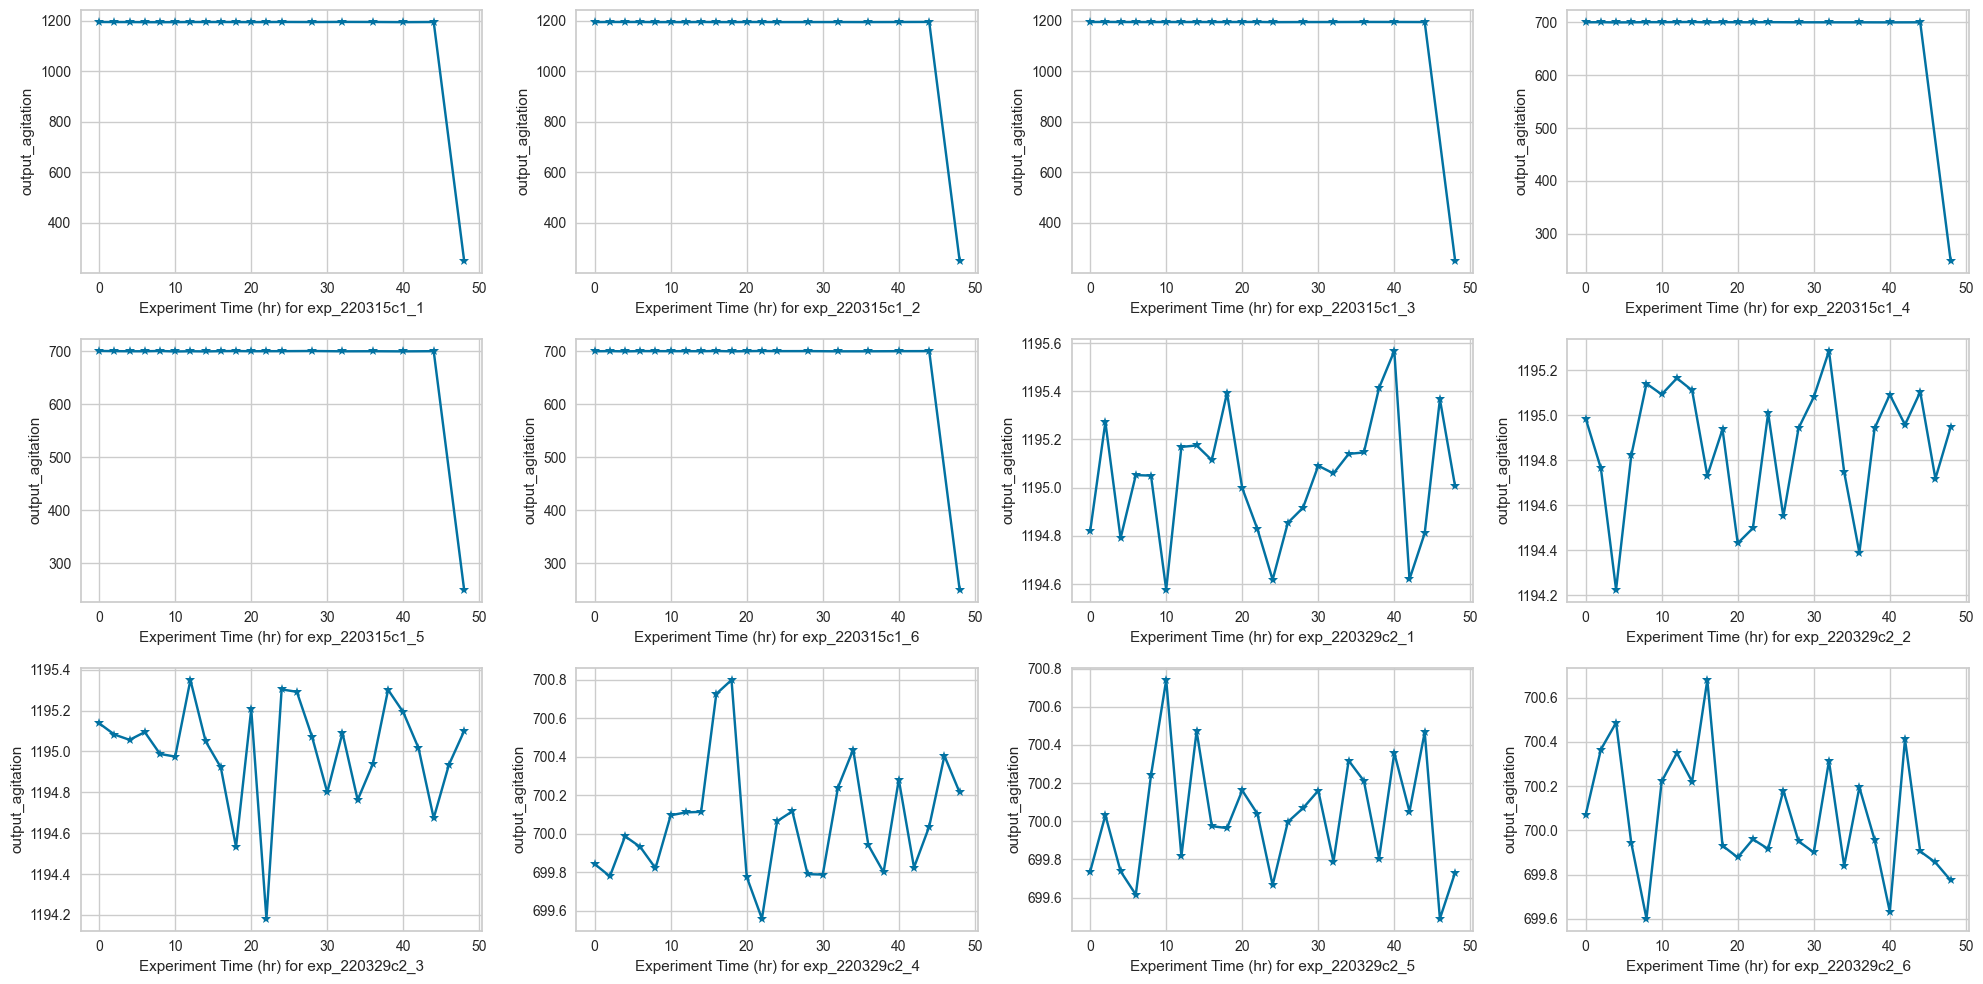

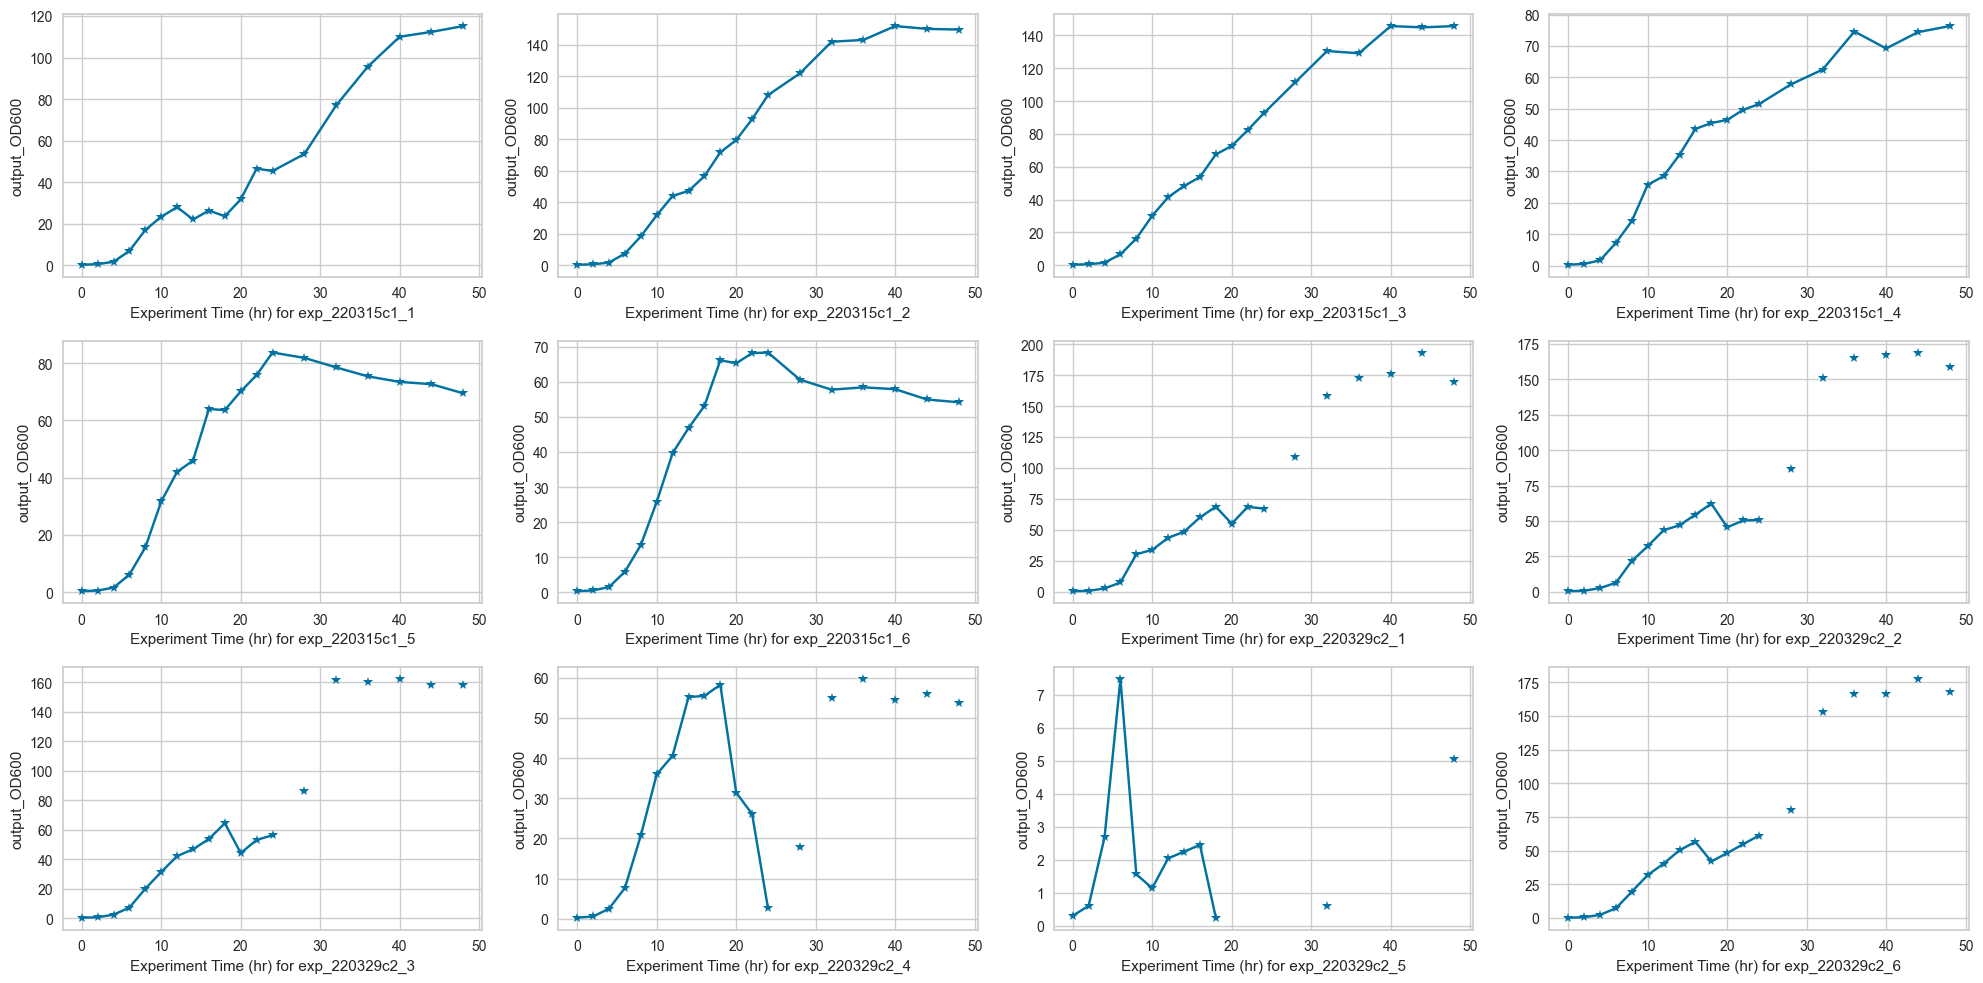

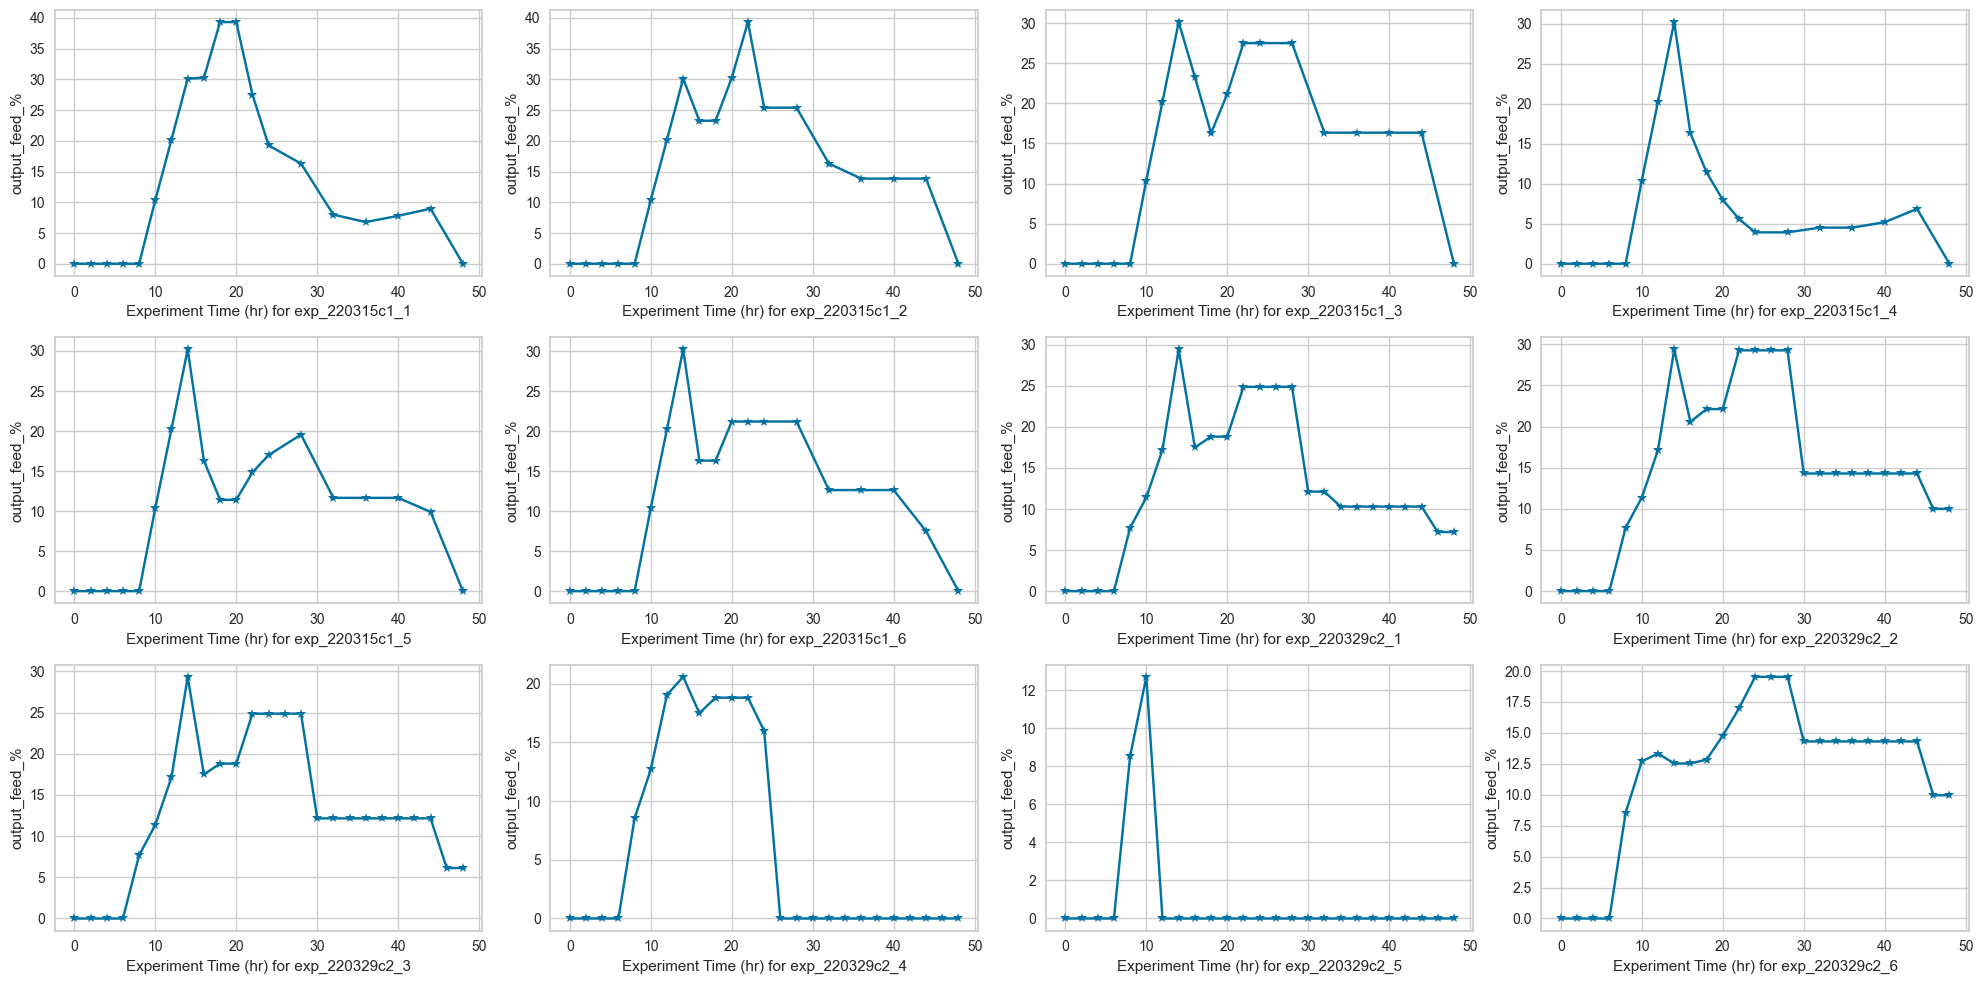

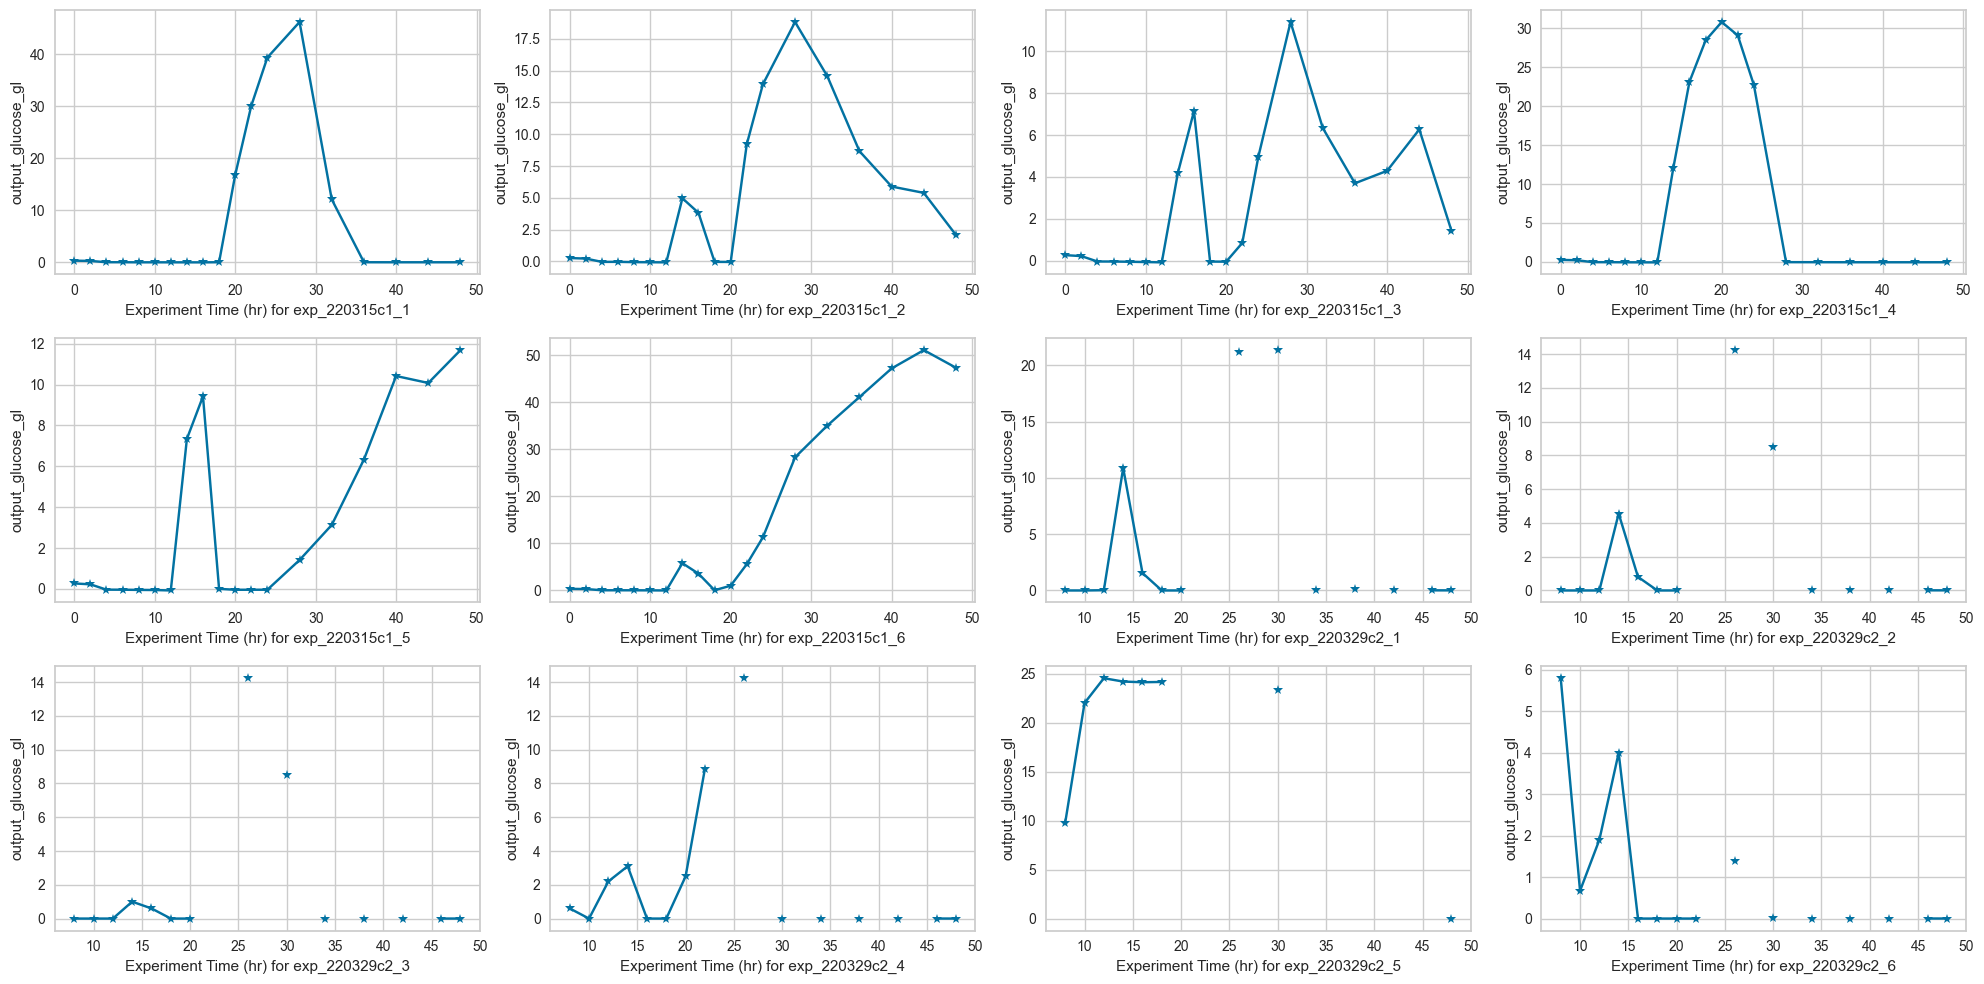

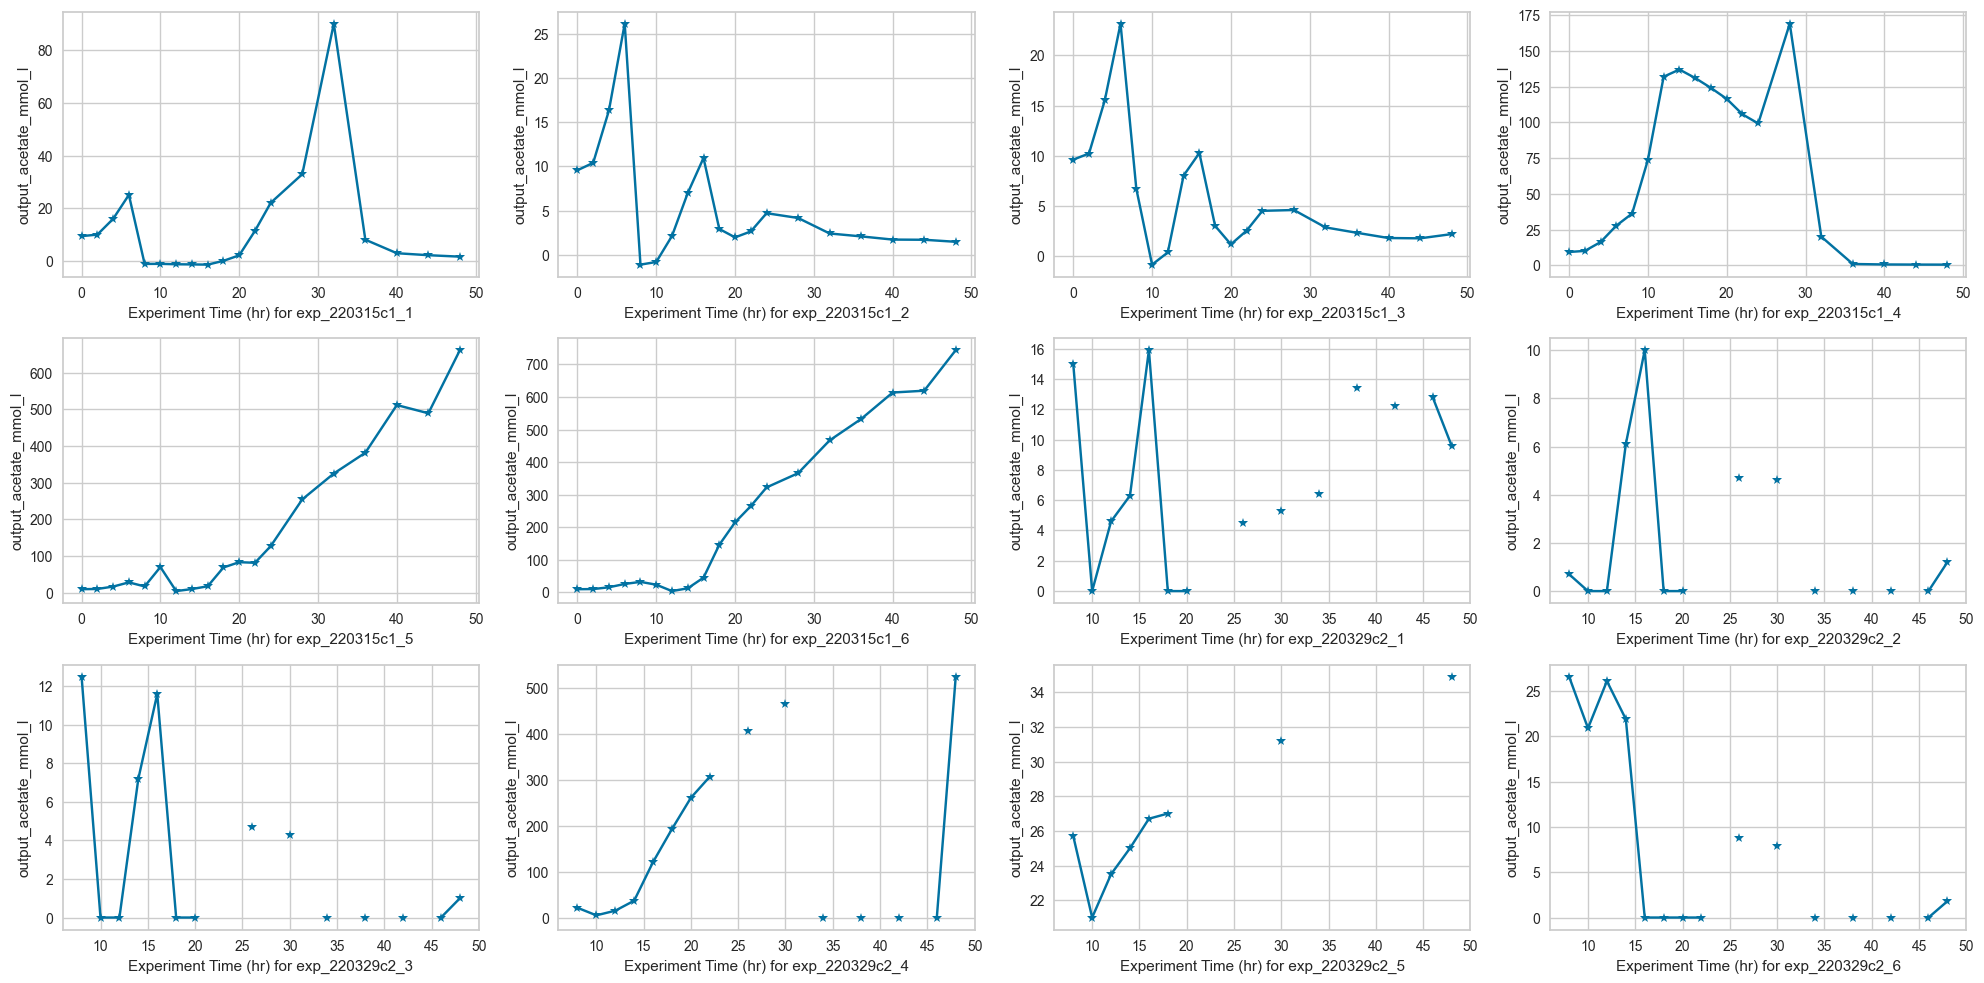

In [60]:
plot_timeseries_list(df_c1c2, ['output_agitation', 'output_OD600', 'output_feed_%', 'output_glucose_gl', 'output_acetate_mmol_l'], save = False) 

In [77]:
# Batch 0: This is the entire dataset. (combined_data.csv or combined_data_extra.csv with missing data imputation)

In [74]:
# Batch 1: Only clean dataset (removed C1-4,5,6 and all C2 batches)         # Acetate levels were too high for C1-4, 5, 6; Agitation was low, and OD was low.
w0_c123 = ['exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
            'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

data_w_c123 = [df for df in experiment_data if df.name not in w0_c123]
data_w_c123 = pd.concat(data_w_c123)
# save_csv(data_w_c123, 'data/use_to_code/data_w_c123.csv')       # All Data without C1-4,5,6 and C2 batches 
# ---------------------------------------------------------------------------------------------------------------------------


Data saved to data/use_to_code/data_w_c123.csv


In [76]:
# Batch 2: Fairly Good Data (removed all C2 batches)            # Acetate levels were too high for C1-4, 5, 6
w0_c1 = ['exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

data_w0_c2 = [df for df in experiment_data if df.name not in w0_c123]
data_w0_c2 = pd.concat(data_w0_c2)
# save_csv(data_w0_c2, 'data/use_to_code/data_w0_c2.csv')         # All Dataframes without C2 batches
# ---------------------------------------------------------------------------------------------------------------------------


Data saved to data/use_to_code/data_w0_c2.csv


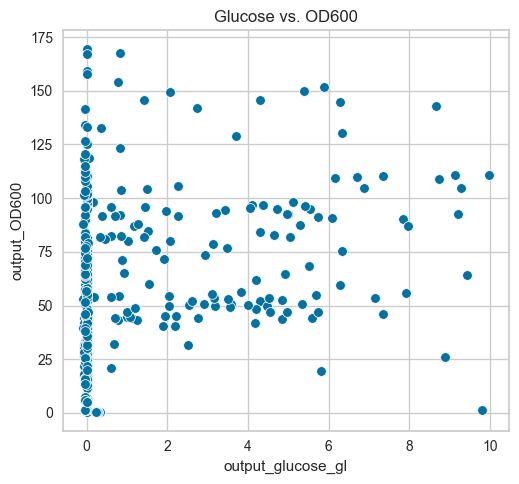

In [38]:

# Scatter plot for Glucose vs. OD600
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='output_glucose_gl', y='output_OD600', data=df_combined.query('output_glucose_gl < 10'))
plt.title('Glucose vs. OD600')

# Scatter plot for Glycerol vs. OD600
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# sns.scatterplot(x='output_glycerol_gl', y='output_OD600', data=df_combined)
# plt.title('Glycerol vs. OD600')

plt.tight_layout()
# plt.savefig("images/scatter_plots/glucose_vs_OD600.png" , dpi = 300)
plt.show()

# Repeat the process for WCW vs. nutrients if needed


> Visualize Outliers

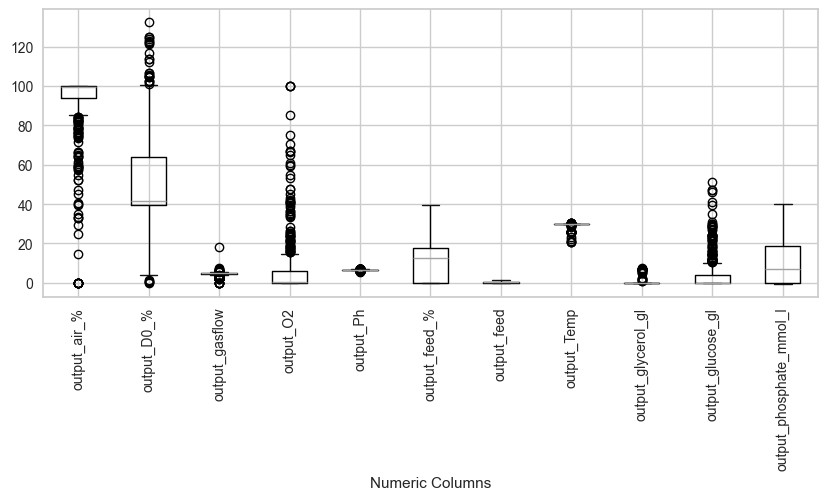

In [87]:

def visualize_outlier (df: pd.DataFrame, save = None):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=["float64", "int64"])
    # Set figure size and create boxplot
    fig, ax = plt.subplots(figsize=(12, 6))
    numeric_cols.boxplot(ax=ax, rot=90)
    # Set x-axis label
    ax.set_xlabel("Numeric Columns")
    # Adjust subplot spacing to prevent x-axis labels from being cut off
    plt.subplots_adjust(bottom=0.4) 
    # Increase the size of the plot
    fig.set_size_inches(10, 6)
    if save is not None:
        plt.savefig(f"images/boxplots/{save}" , dpi=300)
    # Show the plot
    plt.show()



visualize_outlier(df_combined.drop(columns = ['output_OD600','output_WCW_gl','output_acetate_mmol_l', 'output_agitation'], axis=1), save = 'boxplot_1.png')

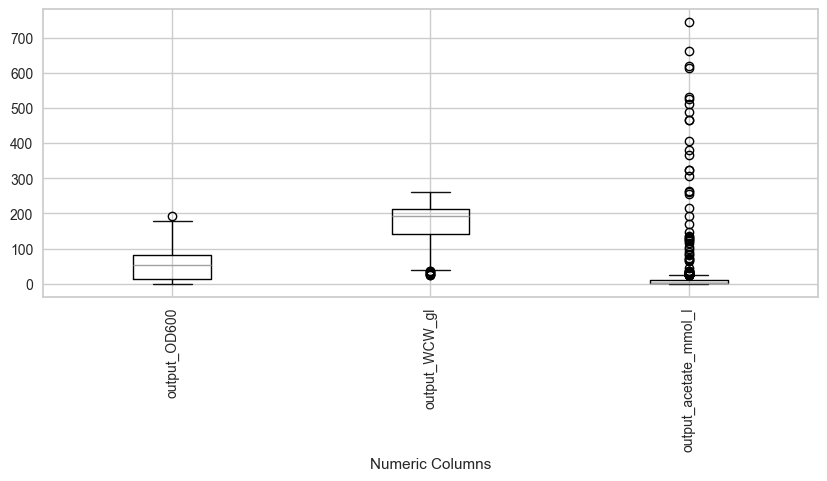

In [88]:
visualize_outlier(df_combined.loc[:, ['output_OD600','output_WCW_gl','output_acetate_mmol_l']], save = 'boxplot_2.png')

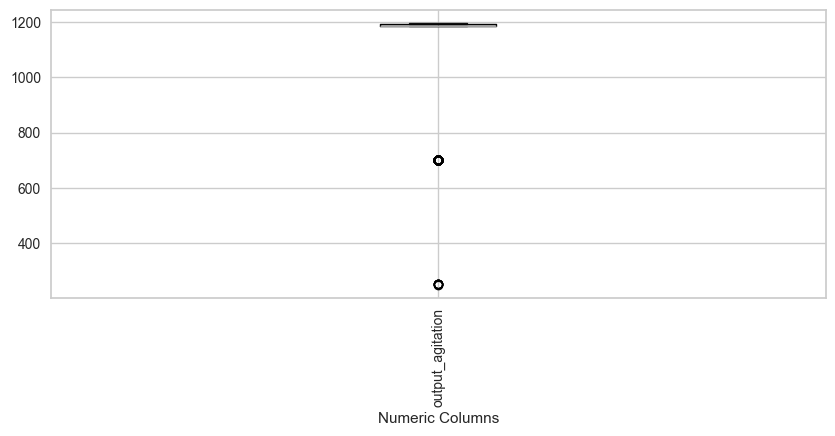

In [90]:
visualize_outlier(df_combined.loc[:, ['output_agitation']], save = 'boxplot_3.png')

In [42]:
# #Visualizing Regression outliers using Cook's distance
# from yellowbrick.regressor import CooksDistance


# # Instantiate and fit the visualizer
# visualizer = CooksDistance()
# visualizer.fit(df_combined_extra.drop(columns = "output_OD600"), df_combined_extra["output_OD600"])
# visualizer.show() 

> Missing Value Imputation

In [43]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor    


# Convert non-numeric values to NaN and ensure the columns are of numeric type
for column in df_combined.columns: 
    if df_combined[column].dtype != 'float64':
        print(f"Converting {column} to float")
        try:
            df_combined[column] = pd.to_numeric(df_combined[column], errors='coerce')
            df_combined[column] = df_combined[column].astype('float64')
        except ValueError as e:
            print(f"Error converting {column} to float: {e}")
            pass # Skip this column, it can't be converted to float

def impute_missing_values_iteratively(X): #or (X, Columns)
    imputer = IterativeImputer(
        # estimator = RandomForestRegressor() 
        estimator=RandomForestRegressor(n_estimators=100, random_state=0), # the estimator to predict the NA
        initial_strategy='mean', # how will NA be imputed in step 1
        max_iter=10, # number of cycles
        imputation_order='ascending', # the order in which to impute the variables
        n_nearest_features=None, # whether to limit the number of predictors
        skip_complete=True, # whether to ignore variables without NA
        random_state=0,)
        
    # select only the columns with missing values to be imputed
    # X_cols = X[columns]
    X_imputed = imputer.fit_transform(X) #or X_cols
    return X_imputed


df_combined_extra = impute_missing_values_iteratively(df_combined)
print("Number of rows after handling missing data: ", df_combined.shape[0])
print("Number of columns after handling missing data: ", df_combined.shape[1])

df_combined_extra = pd.DataFrame(df_combined_extra, columns=df_combined.columns, index=df_combined.index)



Converting output_glycerol_gl to float
Converting output_acetate_mmol_l to float


Number of rows after handling missing data:  684
Number of columns after handling missing data:  15


In [73]:
def save_csv(df, name_path:str):
    df.to_csv(name_path, index=True)
    print(f"Data saved to {name_path}")
    
save_csv(df_combined, r"data/use_to_code/combined_data.csv")              
save_csv(df_combined_extra, r"data/use_to_code/combined_data_extra.csv")

In [45]:
os.getcwd()

'C:\\Users\\pault\\OneDrive - University of Oklahoma\\GRA - Bio-Manufacturing\\1. ML-Cytovance-OU-Research'

> Time Series Split (X_train, X_test)

In [46]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Assuming df_combined_extra is sorted by time

# Separate features and target variable
X = df_combined_extra.drop(columns=['output_OD600'])  # Features (exclude the target variable)
y = df_combined_extra['output_OD600'].values  # Target variable

# Define the number of splits for TimeSeriesSplit
n_splits = 3  # Example value, adjust based on your dataset size and requirements

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Loop through the splits
for train_index, test_index in tscv.split(X):
    # Split the features
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    # Split the target variable
    y_train, y_test = y[train_index], y[test_index]

    # Now you have your train and test sets ready for each split
    # X_train, y_train can be used for training your model
    # X_test, y_test can be used for validating/testing your model

    # You can print the sizes of each split for verification
    print(f"TRAIN: {len(train_index)} samples, TEST: {len(test_index)} samples")


TRAIN: 171 samples, TEST: 171 samples
TRAIN: 342 samples, TEST: 171 samples
TRAIN: 513 samples, TEST: 171 samples


> Scaling the Dataset

In [47]:
# Scale the features.
# =============================================================================
# This script is used to scale the features of the dataset. The scaling process is important to ensure that the features are on a similar scale,
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# X, y = df_combined_extra.drop(columns=['output_OD600']), df_combined_extra  # Assuming X is the feature matrix and y is the target vector

# Initialize a scaler object
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit only on the training set

def scale_and_concat(df, scaler, columns_to_transform):
    """
    Scales selected columns in a DataFrame using StandardScaler and concatenates them with the rest of the DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        columns_to_transform (list): List of column names to be scaled.

    Returns:
        pandas.DataFrame: The concatenated DataFrame with scaled columns.
    """
    # Create a copy of the original DataFrame
    df_concatenated = df.copy()

    # Scale the selected columns
    scaled_columns = scaler.transform(df[columns_to_transform])

    # Create a DataFrame with the scaled columns
    df_scaled = pd.DataFrame(scaled_columns, columns=columns_to_transform, index=df.index)

    # Concatenate the scaled columns with the rest of the DataFrame
    df_concatenated = pd.concat([df_concatenated.drop(columns=columns_to_transform, axis = 1), df_scaled], axis=1)

    return df_concatenated 

X_train = scale_and_concat(X_train, scaler, X_train.columns)
X_test = scale_and_concat(X_test, scaler, X_test.columns)

# # Fit the scaler to the feature matrix X and transform the feature matrix X
# X_scaled = scaler.fit_transform(df_combined_extra.drop(columns=['output_OD600']))  # X_scaled is the scaled feature matrix
# X_scaled = pd.DataFrame(X_scaled, columns=df_combined_extra.drop(columns=['output_OD600']).columns, index=df_combined_extra.index)
# df_combined_extra = pd.concat([X_scaled, df_combined_extra['output_OD600']], axis=1)


In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((513, 14), (171, 14), (513,), (171,))

>> Variable Transformation - apply to train, and then to test

In [49]:
#the decision to scale or transform a variable should be based on its distribution, relationship with the 
# target variable, and domain knowledge. Scaling is not necessary if the variable follows a normal or approximately 
# normal distribution

In [50]:
#Variable transformation involves transforming the values of variables to make them more suitable for analysis
#the idea is to make the variables normally/gaussian distributed. Hence, 

#first step is to assess normality using a histogram or QQ-plot (to explore the variable distribution)

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    # check for skewness
    skewness = df[variable].skew()
    if skewness > 0:
        skew_type = "positively skewed"
    elif skewness < 0:
        skew_type = "negatively skewed"
    else:
        skew_type = "approximately symmetric"
        
    # print message indicating skewness type
    print(f"The variable {variable} is {skew_type} (skewness = {skewness:.2f})")
    
    plt.show()

# # Check function output
# diagnostic_plots(X, "MedInc")


#use this to make diagnostics plot for all variables
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt) 
    plt.show()

NameError: name 'continuous_feature' is not defined

In [ ]:
def qq_plots(df, variable):     
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [ ]:
#If the variables are NOT normally distributed, we then transform it. It is necessary to test several variable 
# transformation methods, and choose the best for that feature. One variable transformation method is log_transform

#NB: if data is positively skewed (right skewed), use (logarithmic, reciprocal, or square root transformation)
    #if data is negatively skewed (left skewed), use (Box-Cox or Yeo-Johnson transformations)
#log transform 
def log_transform(df, columns):
    """
    Transforms specified columns of a pandas DataFrame using the natural logarithm function.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame to transform.
    columns : list
        A list of column names to transform.

    Returns:
    --------
    pandas DataFrame
        The transformed DataFrame.
    """
    transformer = FunctionTransformer(np.log1p, validate=True)
    X = df.values.copy()
    X[:, df.columns.isin(columns)] = transformer.transform(X[:, df.columns.isin(columns)])
    X_log = pd.DataFrame(X, index=df.index, columns=df.columns)
    return X_log

#perform transformation on the variables that are not normally distributed
X_train = log_transform(X_train, columns = ['Vp', 'Caliper'])
X_val = log_transform(X_val, columns = ['Vp', 'Caliper'])
X_test = log_transform(X_test, columns = ['Vp', 'Caliper']) 

In [ ]:
diagnostic_plots(df_log, columns) 

In [ ]:
# Building the ML Model

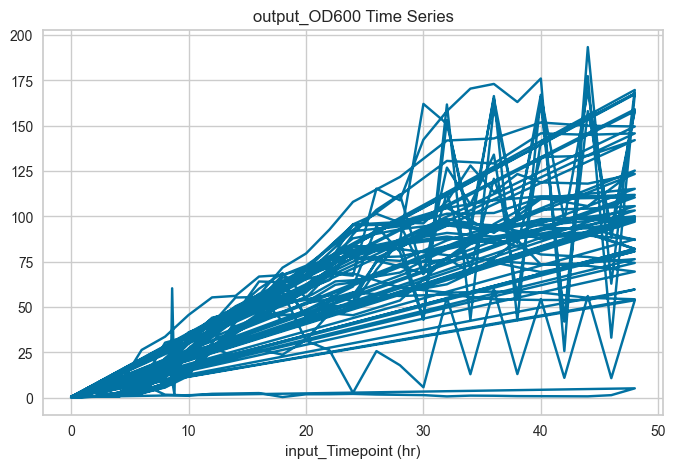

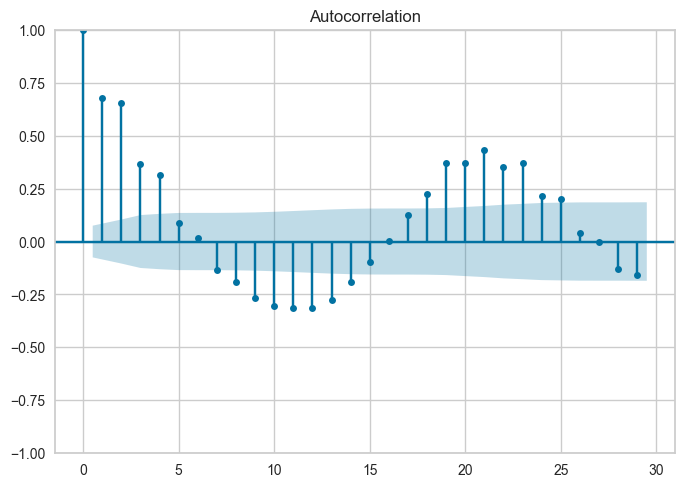

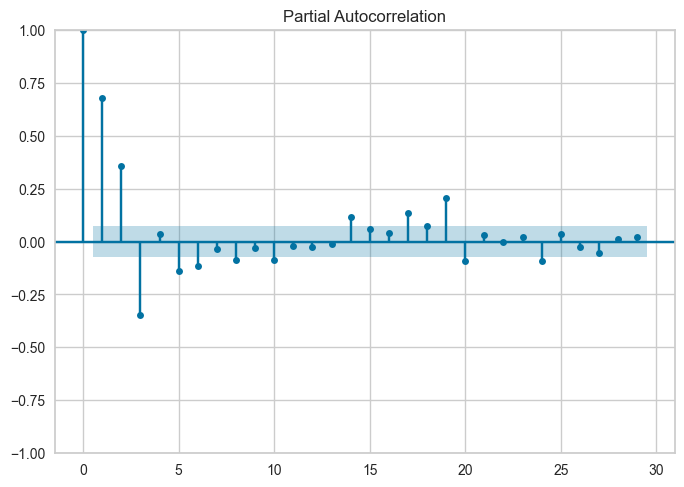

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert the target column to a pandas Series (if it's not already)
ts = df_combined_extra['output_OD600']

plt.figure(figsize=(8,5))
# Visual inspection for stationarity
ts.plot(title='output_OD600 Time Series')
# Plot ACF and PACF
plot_acf(ts)
plot_pacf(ts)
plt.show()


## Model Building

c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results 

                               SARIMAX Results                                
Dep. Variable:           output_OD600   No. Observations:                  684
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3282.516
Date:                Fri, 16 Feb 2024   AIC                           6571.033
Time:                        07:12:33   BIC                           6584.612
Sample:                             0   HQIC                          6576.288
                                - 684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8393      0.023    -36.167      0.000      -0.885      -0.794
ma.L1          0.5065      0.041     12.448      0.000       0.427       0.586
sigma2       873.8709     21.906     39.892      0.0

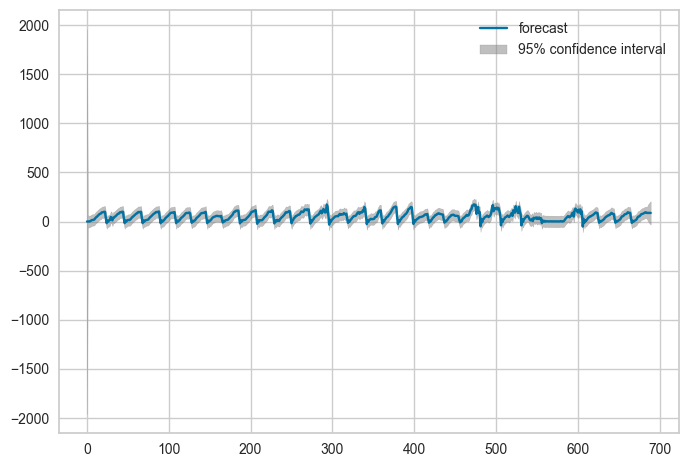

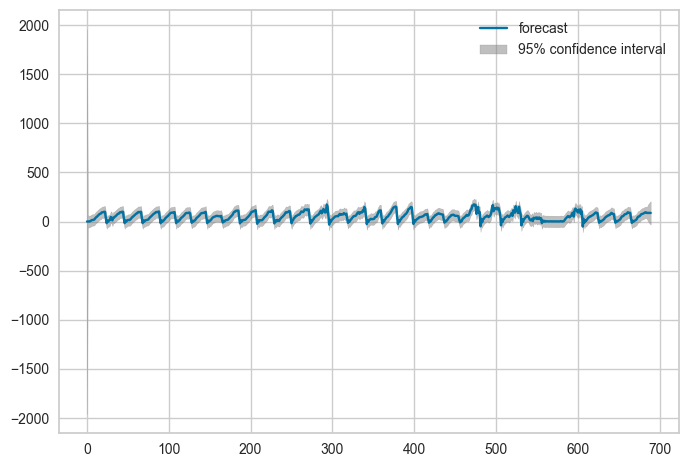

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict


# Step 3: Building the ARIMA Model
# You'll need to choose p, d, q parameters for the ARIMA model. This usually requires domain knowledge or experimentation.

# Example parameters
p, d, q = 1, 1, 1  # Adjust based on your data analysis

# Fit the ARIMA model
model_1 = ARIMA(ts, order=(p, d, q))
model_fit_1 = model_1.fit()

# Summary of the model
print(model_fit.summary())


# Step 4: Make Forecast
# For demonstration, let's forecast the next 5 time points
forecast_steps = 5
forecast = model_fit_1.forecast(steps=forecast_steps)

# Plot the forecast
plot_predict(model_fit_1, end=len(ts) + forecast_steps)




In [ ]:
# Using the SARIMAX Model in Python

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming y_train and X_train are defined and contain your training data
model_2 = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_2 = model_2.fit()


c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#Regression performance report 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


mse, rmse, r2, y_pred = print_regression_performance_report(model, X_test, y_test)

#Regression
    # Error = Actual value - Predicted value

    # MSE (Mean Square Error)
        # The square of the error over all samples is called Mean Squarred Error(MSE).
        # MSE = SQUARE(Actual value - Predicted value)/Number of Samples
    #RMSE (Root Mean Square Error)
    # MAE (Mean Absolute Error)
        # MAE = ABSOLUTE (Actual value - Predicted Value)


In [ ]:
import joblib

# Specify the filename for the saved model
model_filename = 'sarimax_model.joblib'
joblib.dump(model_fit_2, f"models/{model_filename}")  # Save the trained SARIMAX model to file


# save the scaler
scaler_filename = "scaler.joblib"
joblib.dump(scaler, f"models/{scaler_filename}")  # Save the trained scaler to file


# Open a file in write-binary (wb) mode and save the model

print(f"Model saved to {model_filename}")


Model saved to sarimax_model.joblib


In [ ]:
# Make predictions using the test set
# Note: If your SARIMAX model was fit with exogenous variables, you need to provide them during forecasting
forecast = model_fit_2.get_forecast(steps=len(X_test), exog=X_test)

# The forecast object contains various information. To get the predicted mean values:
predicted_mean = forecast.predicted_mean

# The confidence intervals for the forecasts can also be useful:
conf_int = forecast.conf_int()


c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
X_test.columns

Index(['output_WCW_gl', 'output_agitation', 'output_air_%', 'output_D0_%', 'output_gasflow', 'output_O2', 'output_Ph', 'output_feed_%', 'output_feed', 'output_Temp', 'output_glycerol_gl', 'output_glucose_gl', 'output_acetate_mmol_l', 'output_phosphate_mmol_l'], dtype='object')

<a id="6"></a> <br>
## Model Evaluation

>> Class Prediction Error

In [ ]:
from yellowbrick.classifier import ClassPredictionError

# classes = ["apple", "kiwi", "pear", "banana", "orange"]

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

>> Learning Curve (Access the Bias and Variance) - Model Diagnostics

- `Bias` - error in the training data

- `Variance` -> difference in the errors between the train and test data. (i.e.,  it examines how the model's performance varies between the training data and unseen data (like a validation set).  If the model performs well on the training data but poorly on the validation/test data, it suggests high variance)


`High Bias (will also have High Variance) -> Underfitting:` The model is too simple and doesn't capture the complexities of the data well, leading to poor performance on both training and testing datasets.

`Low Bias + High Variance -> Overfitting:` The model is too complex, fitting too closely to the training data, including its noise and outliers. It performs well on training data but poorly on unseen data.

`Low Bias + Low Variance -> Ideal Model:` This is the desired outcome. The model accurately captures the underlying patterns in the data (low bias) and generalizes well to unseen data (low variance).

<p align="center">
  <img src="learning-curves.png" alt="Example Image"/>
</p>



In [ ]:

#check Bias and Variance using Learnng Curve 

train_sizes = np.linspace(0.1, 1.0, 10) # Define the training set sizes to plot the learning curve

def cv_learning_curve(model, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='neg_mean_squared_error')
                                                #scoring parameter -  #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 
    train_mean = np.mean(-train_scores, axis=1)
    train_std = np.std(-train_scores, axis=1)
    test_mean = np.mean(-test_scores, axis=1)
    test_std = np.std(-test_scores, axis=1)
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Error')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()
    
    return train_sizes, train_mean, train_std, test_mean, test_std



# Generate learning curve plot
train_sizes, train_mean, train_std, test_mean, test_std = cv_learning_curve(model, X, y, cv, train_sizes)


# To fix high bias (underfitting):
    # get additional features or increasing the size of the model 
    # Adding polynomial features is a form of feature engineering that can increase the complexity of the model
    # decrease the regularization parameter (lambda) to allow the model's learning algorithm to fit the data more flexibly, 
        # thereby potentially reducing bias

# To fix high variance (overfitting):
    # Obtaining more training samples can help the model generalize better.
    # Simplifying the model by reducing the number of features (feature selection) can prevent the model from fitting noise in the 
        # training data.
    # Increasing the regularization parameter (lambda) adds a penalty to the model complexity, which can help in preventing overfitting.


from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
        )
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

> Cross Validation Scores

In [ ]:
from sklearn.model_selection import learning_curve, cross_val_score, KFold, train_test_split
from yellowbrick.model_selection import CVScores #visualizing the cross validation scores

#check Bias and Variance using Cross Validation

cv = 5  #or # Create a cross-validation object: 
# cv = KFold(n_splits=5, shuffle=True, random_state=42) 

def cv_bias_variance(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')   
    train_error = -scores.mean()
    val_error = -scores.std()
    return train_error, val_error, scores

# options to replace scoring:
#     regression: r2, neg_mean_absolute_error, explained_variance, neg_root_mean_squared_error, etc.
#     classification: accuracy, f1, roc_auc, precision, recall, etc.  


# Calculate the mean training and validation error scores
train_error, val_error, scores = cv_bias_variance(model, X, y, cv)
print("Mean training error:", train_error)
print("Mean validation error:", val_error)


visualizer = CVScores(model, cv=cv, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure




> Plot Validation Curves (to analyse the impact of each Hyperparameter)

In [ ]:
#to analyze the impact of varying hyperparameter values on the model's performance using Validation curve
#the validation curve is useful for hyperparameter tuning, while the learning curve is used to assess bias and variance.

# Using validation curves is a fundamental aspect of machine learning model tuning, as it provides valuable insights into how 
# hyperparameters influence model performance, aiding in the selection of the most appropriate model settings.

from sklearn.model_selection import validation_curve



#the hyperparameter used here is 'max_depth'. A hyperparameter for the model ExtraTreeRegressor

plot_validation_curve(model, X_train, y_train, param_name="max_depth", cv=5, scoring="r2") 

In [ ]:
from yellowbrick.model_selection import ValidationCurve 

# cv = StratifiedKFold(4)
viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

>> Analyze Error Distribution

In [ ]:
# if the errors are normally distributed around zero, it may indicate that the model is making unbiased predictions. 
# If there is a pattern or trend in the errors, it may suggest that the model has systematic biases or is making 
# consistent errors in certain regions of the input space


analyze_error_distribution(y_val, y_pred)

>> Error Analysis - Diagnostics

In [ ]:
#Error analysis is the process of analyzing the errors made by a machine learning model and identifying the patterns 
# or trends that may be causing the errors. The goal of error analysis is to gain insight into the behavior of the 
# model and identify areas for improvement. 

# The steps involved in error analysis:
    # 1. Collect error data - Gather instances where the model made incorrect predictions.
    # 2. Categorize errors - Classify errors into meaningful categories.
    # 3. Identify patterns - Look for commonalities or trends among the errors.
    # 4. Analyze causes - Investigate potential reasons behind these patterns.
    # 5. Prioritize fixes - Decide which errors to address first based on their impact.

    
# Based on the insights gained from the error analysis, you can perform the following.

# False negatives: 
    # To fix this issue, you may consider the following:
        # Increase the weight of the features that are more indicative of churn for low-usage customers, 
            # such as frequency of usage or specific product usage. (adjust the model parameters)
        # Add new features that may be predictive of churn, such as customer sentiment or customer service interactions.
        # Use a different model architecture that is better suited for handling imbalanced data, such as a decision tree 
            # or ensemble model. 


# False positives:
    # To fix this issue, you may consider the following:
        # Decrease the weight of features that are causing false positives, such as age or income, if they are not as 
            # indicative of churn for low-usage customers. (adjust the model parameters)
        # Remove features that are causing false positives altogether, if they are not providing significant value to the 
            # model.
        # Increase the size of the training dataset to capture a more representative sample of customers who do not churn, 
            # which may help the model learn more accurately which customers are likely to churn.


In [ ]:
#Plot confusion matrix to visualize false positives and false negatives
    #By default, scikit-learn will assume that the "positive" class is the last label (or highest label value) 
    # in the list of labels. [0, 1] where 1 is Positive and is the class_of_interest.


class_names = [0, 1] #or iris().target_names #this is an example and should be edited. [0, 1] for binary classification
class_of_interest = 1 #this selects a specific class of interest other than 1 or the highest value. 
                        #always select the highest one because that is what Scikit learn uses. 

def false_positives(X_test, y_true, y_pred, classes):
    """ 
    This function identifies and plots the false positives in a classification problem. 
    """ 
    fp_indices = np.where((y_true != class_of_interest) & (y_pred == class_of_interest))[0] 
    fp_features = X_test[fp_indices] # assuming X_test is a numpy array of input data 
    # fp_features = X_test.iloc[fp_indices]
    fp_labels = y_pred[fp_indices] # assuming y_pred is a numpy array of predicted labels 
    # fp_labels = pd.Series(y_pred).iloc[fp_indices]

    print("False positives: ", len(fp_indices))
    return fp_features, fp_labels


#false negatives 
def false_negatives(X_test, y_true, y_pred, classes):
    """ 
    This function identifies and plots the false negatives in a classification problem. 
    """ 
    fn_indices = np.where((y_true == class_of_interest) & (y_pred != class_of_interest))[0] 
    fn_features = X_test[fn_indices] # assuming X_test is a numpy array of input data
    # fn_features = X_test.iloc[fn_indices] 
    fn_labels = y_pred[fn_indices] # assuming y_pred is a numpy array of predicted labels 
    # fn_labels = pd.Series(y_pred).iloc[fn_indices]

    print("False negatives: ", len(fn_indices))
    return fn_features, fn_labels


# Plot the confusion matrix to evaluate the performance of the model
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, Accuracy = {:.2f}'.format(accuracy))

# Identify and plot the false positives
X_fp, y_fp = false_positives(X_test, y_test, y_pred, class_names)

# Identify and plot the false negatives
X_fn, y_fn = false_negatives(X_test, y_test, y_pred, class_names)

<a id="7"></a> <br>
## Feature Engineering

>> Feature Importances

In [ ]:
#access the most important features in the model

#depending on the results from the bias and variance tests, there may be need to assess which features
# are the most important in the ML model


def feature_importance(model,X):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

feature_importance(model,X_train)  



#OR
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model, labels=labels, relative=False)
viz.fit(X, y)
viz.show()

> Visualize Model Performance during Feature Selection/Extraction

In [ ]:
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import StratifiedKFold 


cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure



>> Feature Selection and Extraction - (Fix High Variance)

In [ ]:
# Addressing High Variance in Models through Feature Selection/Extraction

# Overview
    # Goal: Improve model generalization by reducing complexity or enhancing informative representations.
    # Application: Apply techniques to training data, then to test data.
    
# Initial Steps
    # Assess feature importance.
    # Options:
        # Add or remove features based on their importance.
        # Consider creating polynomial features for more complex relationships.

# Feature Selection/Extraction Strategies

    # Step 1: Manual Feature Adjustment
        # Add or remove features based on domain knowledge or preliminary analysis.
        
    # Step 2: Automated Techniques (start with feature selection)
    
        # Feature Selection Methods:
            # VarianceThreshold: Remove features with low variance.
            # Univariate Selection: Use methods like SelectKBest, SelectPercentile, or GenericUnivariateSelect.
            # Recursive Feature Elimination: RFE or RFECV (with cross-validation).
            # Model-Based Selection: Use SelectFromModel with L1-based (Lasso, Ridge, ElasticNet) or tree-based methods.
            # Sequential Feature Selector: Forward or backward selection (SFS).
            
        # Feature Extraction Methods:
            # Principal Component Analysis (PCA).
            # Independent Component Analysis (ICA).
            # t-Distributed Stochastic Neighbor Embedding (t-SNE).
        
        # Common Choices: PCA for extraction and SelectKBest for selection.

# Workflow for Model Improvement 
    # Build and test a model with normal data.
    # If accuracy is not satisfactory, perform feature selection and retest.
        # Optionally, add polynomial features to the selected features and retest.
    # If needed, proceed to feature extraction and retest.
        # Again, consider adding polynomial features and retesting.

> Adding Polynomial Features (Fix High Bias)

In [ ]:
#Adding Polynomial Features (to Fix High Bias) - do this only if there is high variance

from sklearn.preprocessing import PolynomialFeatures

df_polynomial = add_polynomial_features_sklearn(df, degree, columns=None)


>> Performing Regularization (fix High Variance)

In [ ]:
#Another way to fix High Bias or Variance is to perform regularization on the model.
#this would involve increasing or decreasing the regularization parameter (lambda) to fix high variance or bias


# By tuning the hyperparameters of the model using cross-validation, 
# we would have effectively applied regularization to the model, which can help to reduce overfitting and improve 
# its generalization performance.

#Hence the next step is MODEL OPTIMIZATION. 

<a id="8"></a> <br>
## Model Optimization

>> Auto Hyperparameter Optimization using Optuna

In [ ]:
from sklearn.svm import SVC
import optuna

SVC().get_params()

In [ ]:
# Set the logging level for Optuna to WARNING
# logging.getLogger('optuna').setLevel(logging.WARNING) 

def objective(trial):
    # Define the hyperparameters' search space
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3  # degree is only used for 'poly' kernel

    # Create the SVM model
    model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, probability=True)

    cv = StratifiedKFold(n_splits=10,random_state=11,shuffle=True) 
    
    # Perform cross-validation and compute the average AUC score
    scores = cross_val_score(model, train_data, train_labels, scoring='roc_auc', n_jobs=-1, cv=cv)
    avg_auc_test = np.mean(scores)

    return avg_auc_test

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best hyperparameters
best_hyperparams = study.best_trial.params
# print('Best Hyperparameters:', best_hyperparams)



In [ ]:
# Best hyperparameters obtained from Optuna
best_C_svm = best_hyperparams['C']
best_kernel = best_hyperparams['kernel']
best_gamma = best_hyperparams['gamma']
best_degree = best_hyperparams['degree'] 


print('Best C (svm): {}'.format(best_C_svm))
print('Best kernel: {}'.format(best_kernel))
print('Best gamma: {}'.format(best_gamma))
print('Best degree: {}'.format(best_degree))

tuned_svm_model = SVC(C=best_C_svm, kernel=best_kernel, gamma=best_gamma, degree = best_degree, probability=True)

tuned_svm_model.fit(train_data, train_labels)

dump(tuned_svm_model, 'models/tuned_model/tuned_support_vector.joblib')



In [ ]:
y_pred,ACC,PC,RC,FS,AP,roc_auc,gini = print_classification_performance2class_report(tuned_svm_model,valid_data,valid_labels) 